## **EDA CASE STUDY**

# IMPORT LIBRARIES AND THE DATASET.


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

pd.set_option('display.max_columns',80)
pd.options.display.float_format = '{:.4f}'.format

In [3]:
applicationData_Path = "D:/study_materials/pg/datatoolkit/eda group case study/Credit EDA Case Study/application_data.csv"
prevApplication_Path = "D:/study_materials/pg/datatoolkit/eda group case study/Credit EDA Case Study/previous_application.csv"

In [4]:
#Importing the csv files into 2 dataframes.
dfApp = pd.read_csv(applicationData_Path)
dfPrev = pd.read_csv(prevApplication_Path)

# ROUTINE DATASET CHECK

In [5]:
print(dfApp.columns) ##inspecting the columns
print(dfApp.shape) ##inspecting the shape
print(dfApp.dtypes) ##inspecting the datatypes of variables
print(type(dfApp)) ##inspecting the variable on application dataset.

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
(307511, 122)
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object
<class 'pandas.core.f

In [6]:
##further inspecting the datasets
print(dfApp.info()) ##list down all the columns along with name ,no of non null values,datatype,memory usage
print(dfApp.describe()) ##describe dataset's mean,std,min,25%,50%,75%,max

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
       SK_ID_CURR      TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  \
count 307511.0000 307511.0000   307511.0000       307511.0000  307511.0000   
mean  278180.5186      0.0807        0.4171       168797.9193  599025.9997   
std   102790.1753      0.2724        0.7221       237123.1463  402490.7770   
min   100002.0000      0.0000        0.0000        25650.0000   45000.0000   
25%   189145.5000      0.0000        0.0000       112500.0000  270000.0000   
50%   278202.0000      0.0000        0.0000       147150.0000  513531.0000   
75%   367142.5000      0.0000        1.0000       202500.0000  808650.0000   
max   456255.0000      1.0000       19.0000    117000000.0000 4050000.0000   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count

In [7]:
#Unique values and counts for all columns
dfApp.apply(pd.Series.value_counts)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
-25229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-25201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-25200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-25197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-25196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
org spec account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5619.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reg oper account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# DATA QUALITY CHECK AND MISSING VALUE ANALYSIS.


## Find the % of missing values for all columns.


In [8]:
#Percentage of missing values in each col.
nullseries = round(dfApp.isnull().sum() * 100 / len(dfApp),2)
print(nullseries)

SK_ID_CURR                    0.0000
TARGET                        0.0000
NAME_CONTRACT_TYPE            0.0000
CODE_GENDER                   0.0000
FLAG_OWN_CAR                  0.0000
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY    13.5000
AMT_REQ_CREDIT_BUREAU_WEEK   13.5000
AMT_REQ_CREDIT_BUREAU_MON    13.5000
AMT_REQ_CREDIT_BUREAU_QRT    13.5000
AMT_REQ_CREDIT_BUREAU_YEAR   13.5000
Length: 122, dtype: float64


## Remove cols with high (>50%) missing value percentage.

In [9]:
##Checking columns having null value greater than or equal to 50%
print(nullseries[nullseries >= 50])

OWN_CAR_AGE                65.9900
EXT_SOURCE_1               56.3800
APARTMENTS_AVG             50.7500
BASEMENTAREA_AVG           58.5200
YEARS_BUILD_AVG            66.5000
COMMONAREA_AVG             69.8700
ELEVATORS_AVG              53.3000
ENTRANCES_AVG              50.3500
FLOORSMIN_AVG              67.8500
LANDAREA_AVG               59.3800
LIVINGAPARTMENTS_AVG       68.3500
LIVINGAREA_AVG             50.1900
NONLIVINGAPARTMENTS_AVG    69.4300
NONLIVINGAREA_AVG          55.1800
APARTMENTS_MODE            50.7500
BASEMENTAREA_MODE          58.5200
YEARS_BUILD_MODE           66.5000
COMMONAREA_MODE            69.8700
ELEVATORS_MODE             53.3000
ENTRANCES_MODE             50.3500
FLOORSMIN_MODE             67.8500
LANDAREA_MODE              59.3800
LIVINGAPARTMENTS_MODE      68.3500
LIVINGAREA_MODE            50.1900
NONLIVINGAPARTMENTS_MODE   69.4300
NONLIVINGAREA_MODE         55.1800
APARTMENTS_MEDI            50.7500
BASEMENTAREA_MEDI          58.5200
YEARS_BUILD_MEDI    

In [10]:
#Dropping all columns having a missing value percentage greater than 50%.
dfApp = dfApp.drop(dfApp.loc[:,list((100*(dfApp.isnull().sum()/len(dfApp.index))>=50))].columns, 1)

In [11]:
#Checking if all the columns greater than 50% are dropped. 
print(dfApp.shape)
print(dfApp.columns)

(307511, 81)
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION

When we check the shape of the dataset , 41 columns have been removed.

## Imputing cols which have a missing value percentage of about 13%

To check for cols having 13% null values and provide a suitable way to impute the data.

In [12]:
#Percentage of missing values in each col.
nullseries = round(dfApp.isnull().sum() * 100 / len(dfApp),2)
print(nullseries)

SK_ID_CURR                    0.0000
TARGET                        0.0000
NAME_CONTRACT_TYPE            0.0000
CODE_GENDER                   0.0000
FLAG_OWN_CAR                  0.0000
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY    13.5000
AMT_REQ_CREDIT_BUREAU_WEEK   13.5000
AMT_REQ_CREDIT_BUREAU_MON    13.5000
AMT_REQ_CREDIT_BUREAU_QRT    13.5000
AMT_REQ_CREDIT_BUREAU_YEAR   13.5000
Length: 81, dtype: float64


In [13]:
print(nullseries[nullseries >= 10])

OCCUPATION_TYPE                31.3500
EXT_SOURCE_3                   19.8300
YEARS_BEGINEXPLUATATION_AVG    48.7800
FLOORSMAX_AVG                  49.7600
YEARS_BEGINEXPLUATATION_MODE   48.7800
FLOORSMAX_MODE                 49.7600
YEARS_BEGINEXPLUATATION_MEDI   48.7800
FLOORSMAX_MEDI                 49.7600
TOTALAREA_MODE                 48.2700
EMERGENCYSTATE_MODE            47.4000
AMT_REQ_CREDIT_BUREAU_HOUR     13.5000
AMT_REQ_CREDIT_BUREAU_DAY      13.5000
AMT_REQ_CREDIT_BUREAU_WEEK     13.5000
AMT_REQ_CREDIT_BUREAU_MON      13.5000
AMT_REQ_CREDIT_BUREAU_QRT      13.5000
AMT_REQ_CREDIT_BUREAU_YEAR     13.5000
dtype: float64


In [14]:
#We can observe that these cols have null percentage of 13%
req_cols=['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']

for col in req_cols:
    print(dfApp[col].median())

0.0
0.0
0.0
0.0
1.0


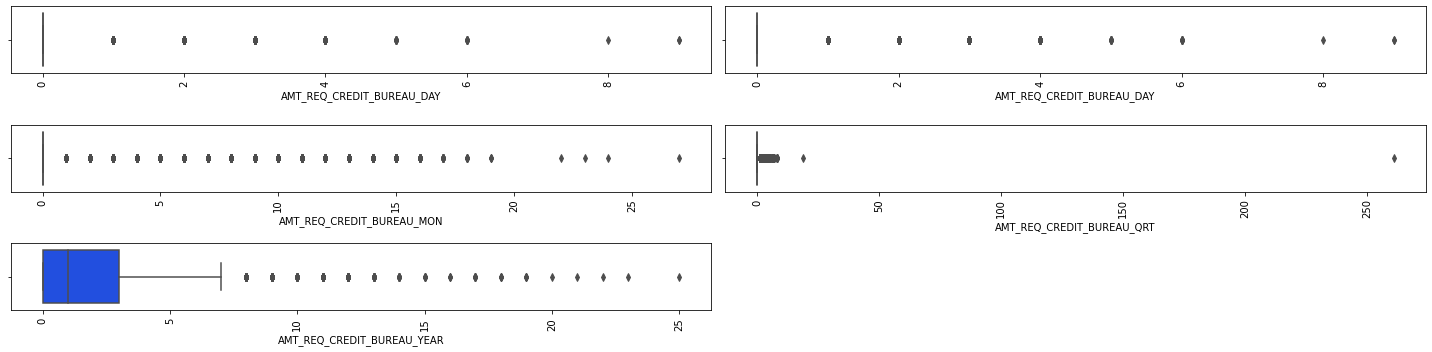

In [15]:
req_cols=['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']
plt.figure(figsize = (20, 5))
sns.set_palette('bright')
for col in enumerate(req_cols):
    plt.subplot(3, 2, col[0]+1)
    sns.boxplot(x = col[1], data = dfApp)
    plt.xticks(rotation = 90)
    plt.tight_layout()




1.   When have a look at the plots, all these variables have outliers, and imputing it with mean might affect the entire column.



---


2.  The enquire data cannot be decimal value as it provides information about the number of enquiries made which is not a decimal value. 








HENCE IT IS BETTER TO IMPUTE THE DATA OF ALL THESE COLUMNS WITH MEDIAN.



---



EXAMPLE TO IMPUTE THE DATA FOR A CATEGORIAL VARIABLE.

In [16]:
#Percentage of missing values for NAME_TYPE_SUITE
dfApp.NAME_TYPE_SUITE.isnull().sum() * 100 / len(dfApp)

0.42014757195677555

In [17]:
#Frequency of values in NAME_TYPE_SUITE is found to be higher for Unaccompanied.
dfApp.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

We can suggest that , since Unaccompanied has a greater frequency when compared to other categories, MODE can be used to impute the data in this case.

## Handling data types of all columns and changing dtype wherever necessary.

In [18]:
#To check DataTypes of all columns.
dfApp.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 81, dtype: object

In [19]:
#Converting the negative DAYS_BIRTH column to positive.
dfApp.DAYS_BIRTH = dfApp.DAYS_BIRTH.abs() // 365
dfApp.DAYS_BIRTH.head(10)

0    25
1    45
2    52
3    52
4    54
5    46
6    37
7    51
8    55
9    39
Name: DAYS_BIRTH, dtype: int64

In [20]:
#Converting the negative DAYS_EMPLOYED column to positive.
dfApp.DAYS_EMPLOYED = dfApp.DAYS_EMPLOYED.abs() // 365
dfApp.DAYS_EMPLOYED.head(10)

0       1
1       3
2       0
3       8
4       8
5       4
6       8
7       1
8    1000
9       5
Name: DAYS_EMPLOYED, dtype: int64

In [21]:
#To find the current dtype of HOUR_APPR_PROCESS_START.
dfApp.HOUR_APPR_PROCESS_START.describe()

count   307511.0000
mean        12.0634
std          3.2658
min          0.0000
25%         10.0000
50%         12.0000
75%         14.0000
max         23.0000
Name: HOUR_APPR_PROCESS_START, dtype: float64

In [22]:
#Converting to DateTime format.
dfApp['HOUR_APPR_PROCESS_START'] = pd.to_timedelta(dfApp.HOUR_APPR_PROCESS_START, unit='h')

In [23]:
#We can see that the float type is now converted to timedelta type.
dfApp.HOUR_APPR_PROCESS_START.head()

0   0 days 10:00:00
1   0 days 11:00:00
2   0 days 09:00:00
3   0 days 17:00:00
4   0 days 11:00:00
Name: HOUR_APPR_PROCESS_START, dtype: timedelta64[ns]

Converting Continuous variable data to categorical variable data.

In [24]:
dfApp.TARGET.dtype

dtype('int64')

In [25]:
dfApp.TARGET = dfApp.TARGET.astype('category')

In [26]:
dfApp.TARGET.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [27]:
dfApp.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Here , we can see that Target column is converted to Object as required.

## Report outliers in different cols

Checking for Outliers

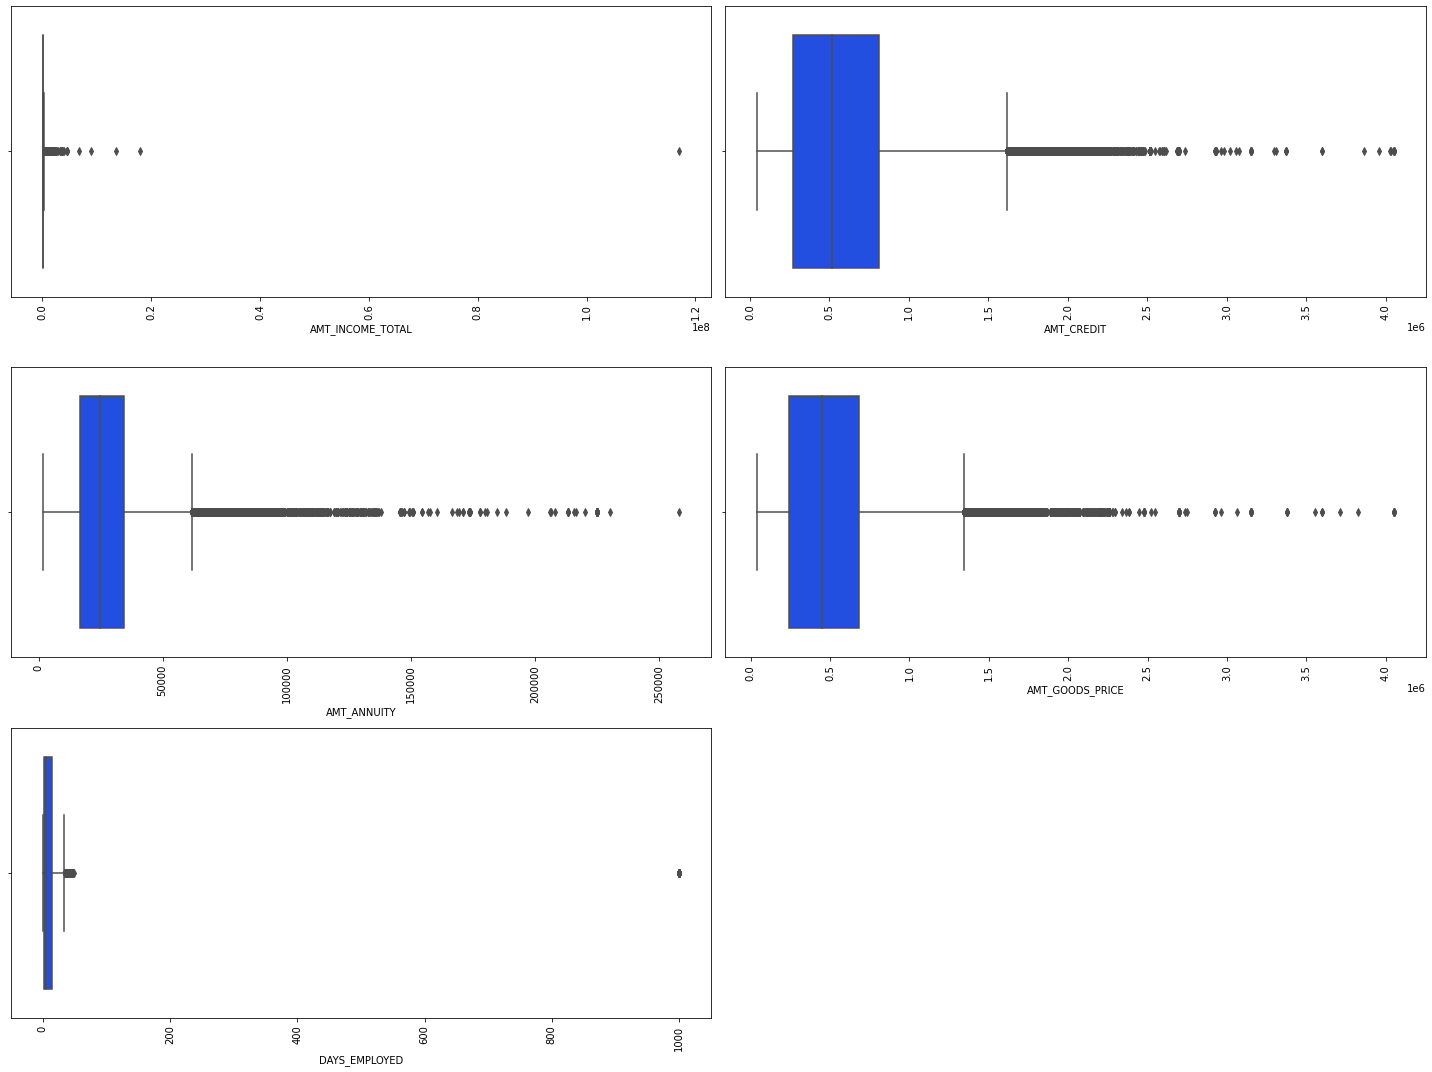

In [28]:
req_cols=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_EMPLOYED']
plt.figure(figsize = (20, 15))
sns.set_palette('bright')
for col in enumerate(req_cols):
    plt.subplot(3, 2, col[0]+1)
    sns.boxplot(x = col[1], data = dfApp)
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [29]:
#Checking for unique values in the DAYS_EMPLOYED column.
dfApp.DAYS_EMPLOYED.value_counts()

1000    55374
1       31841
2       29648
0       27904
3       25107
4       21767
5       16271
6       15051
7       13148
8       11440
9        8980
10       7364
11       5902
12       5309
14       4643
13       4349
15       2725
16       2335
17       2006
18       1918
19       1871
20       1600
21       1461
22       1253
23       1016
24        914
25        821
27        656
26        653
28        611
29        567
30        457
31        437
34        364
32        351
33        331
35        257
36        196
37        138
39        125
38        116
41         59
40         59
42         42
44         31
43         19
45         14
46          4
48          4
47          1
49          1
Name: DAYS_EMPLOYED, dtype: int64

From this we can see, that there is a value for 1000 years of employment which is not possible and hence it is an outlier.

In [30]:
#To find statistical parameter to observe outliers in the data.
dfApp.AMT_INCOME_TOTAL.describe()

count      307511.0000
mean       168797.9193
std        237123.1463
min         25650.0000
25%        112500.0000
50%        147150.0000
75%        202500.0000
max     117000000.0000
Name: AMT_INCOME_TOTAL, dtype: float64

In [31]:
#diff will provide the difference between outliers and 99th percentile. If the value is too big, we can conclude that there are outliers.
diff1 = dfApp.AMT_INCOME_TOTAL.max() - dfApp.AMT_INCOME_TOTAL.quantile(0.99)
diff1

116527500.0

In [32]:
dfApp.AMT_ANNUITY.describe()

count   307499.0000
mean     27108.5739
std      14493.7373
min       1615.5000
25%      16524.0000
50%      24903.0000
75%      34596.0000
max     258025.5000
Name: AMT_ANNUITY, dtype: float64

In [33]:
diff2 = dfApp.AMT_ANNUITY.max() - dfApp.AMT_ANNUITY.quantile(0.99)
diff2

188019.0

In [34]:
dfApp.AMT_CREDIT.describe()

count    307511.0000
mean     599025.9997
std      402490.7770
min       45000.0000
25%      270000.0000
50%      513531.0000
75%      808650.0000
max     4050000.0000
Name: AMT_CREDIT, dtype: float64

In [35]:
diff3 = dfApp.AMT_CREDIT.max() - dfApp.AMT_CREDIT.quantile(0.99)
diff3

2196000.0

In [36]:
dfApp.AMT_GOODS_PRICE.describe()

count    307233.0000
mean     538396.2074
std      369446.4605
min       40500.0000
25%      238500.0000
50%      450000.0000
75%      679500.0000
max     4050000.0000
Name: AMT_GOODS_PRICE, dtype: float64

In [37]:
diff4 = dfApp.AMT_GOODS_PRICE.max() - dfApp.AMT_GOODS_PRICE.quantile(0.99)
diff4

2250000.0

**Since the difference between 99th percentile and max value is very high, we can conclude that there are outliers.**

## Binning of continuous variable into categorical variable.

In [38]:
#Creating bins for Age column.
dfApp['AGE_RANGE'] = pd.cut(x=dfApp['DAYS_BIRTH'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30','30-40','40-50','50-60','>60'])

In [39]:
# Creating bins for amount
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
label_title = ['0-50000','50000-100000','100000-150000', '150000-200000',
       '200000-250000','250000-300000','300000-350000','350000-400000',
        '400000-450000','450000-500000','500000 and above']


In [40]:
#Binning AMT_INCOME_RANGE
dfApp['AMT_INCOME_RANGE']=pd.cut(dfApp['AMT_INCOME_TOTAL'],bins,labels=label_title)

In [41]:
#Binning AMT_CREDIT_RANGE
dfApp['AMT_CREDIT_RANGE']=pd.cut(dfApp['AMT_CREDIT'],bins=bins,labels=label_title)

In [42]:
#To check the value_counts of the binned variable.
dfApp.AGE_RANGE.value_counts()

30-40    83117
40-50    74401
50-60    67819
20-30    52805
>60      29368
Name: AGE_RANGE, dtype: int64

In [43]:
#To check the value_counts of the binned variable.
dfApp.AMT_INCOME_RANGE.value_counts()

100000-150000       91591
150000-200000       64307
50000-100000        59181
200000-250000       48137
250000-300000       17039
300000-350000        8874
350000-400000        5802
400000-450000        4924
0-50000              4517
500000 and above     2702
450000-500000         437
Name: AMT_INCOME_RANGE, dtype: int64

In [44]:
#To check the value_counts of the binned variable.
dfApp.AMT_CREDIT_RANGE.value_counts()

500000 and above    158178
250000-300000        31759
200000-250000        23054
400000-450000        18239
150000-200000        17985
300000-350000        16205
450000-500000        13799
100000-150000        12155
350000-400000        10133
50000-100000          5443
0-50000                561
Name: AMT_CREDIT_RANGE, dtype: int64

# ANALYSIS 

### CHECKING IMBALANCE PERCENTAGE 

In [45]:
#Checking for Target Data imbalance
100*dfApp['TARGET'].value_counts(normalize='True')

0   91.9271
1    8.0729
Name: TARGET, dtype: float64

In [46]:
Target_data_imbalance_ratio= (round( (len(dfApp.loc[dfApp["TARGET"]==0])/ len(dfApp.loc[dfApp["TARGET"]==1])),2))
print(Target_data_imbalance_ratio)

11.39


DataImbalance Ratio for Target  = 11.39 

About 91.9% dont have difficulties in paying loan.
And 9% of people are defaulters.

In [47]:
100*dfApp['NAME_CONTRACT_TYPE'].value_counts(normalize='True')

Cash loans        90.4787
Revolving loans    9.5213
Name: NAME_CONTRACT_TYPE, dtype: float64

In [48]:
Contract_Type_Dataimbalance=(round( (len(dfApp.loc[dfApp["NAME_CONTRACT_TYPE"]=="Cash loans"])/ len(dfApp.loc[dfApp["NAME_CONTRACT_TYPE"]=="Revolving loans"])),2))
Contract_Type_Dataimbalance

9.5

DataImbalance Ratio for NAME_CONTRACT_TYPE = 9.5

About 90.5% have cash loans.
And 9% of people are revolving loans.

**DataImbalance Ratio for Target  = 11.39** <br><br>

**About 91.9% dont have difficulties in paying loan**. <br>
**And 9% of people are defaulters.**

##DIVIDING DATA INTO TARGET 1 AND TARGET 0 

In [49]:
tar0= dfApp['TARGET']==0 ## to filter the rows with target0.Boolean value is returned (true for 0 , false for 1)
tar1= dfApp['TARGET']==1 ## to filter the rows with target1.Boolean value is returned (true for 1 , false for 0)

In [50]:
#Target 0 and Target 1 are the new dataframes.
target0= dfApp[tar0]
target1= dfApp[tar1]

In [51]:
print(target0.shape)
print(target1.shape)

(282686, 84)
(24825, 84)


## UNIVARIATE ANALYSIS - TARGET 1 


cols_considered = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE','AGE_RANGE','DAYS_EMPLOYED' , 'OCCUPATION_TYPE' , 'CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','AMT_INCOME_RANGE','AMT_CREDIT_RANGE']




In [52]:
100*target1['CODE_GENDER'].value_counts(normalize='True')

F   57.0796
M   42.9204
Name: CODE_GENDER, dtype: float64

We can see that there is a higher percentage for female. 

In [53]:
100*target1['NAME_EDUCATION_TYPE'].value_counts(normalize='True')

Secondary / secondary special   78.6465
Higher education                16.1490
Incomplete higher                3.5126
Lower secondary                  1.6798
Academic degree                  0.0121
Name: NAME_EDUCATION_TYPE, dtype: float64

We can see that people majorly have completed secondary education.


In [54]:
100*target1['NAME_HOUSING_TYPE'].value_counts(normalize='True')


House / apartment     85.6878
With parents           6.9930
Municipal apartment    3.8469
Rented apartment       2.4209
Office apartment       0.6928
Co-op apartment        0.3585
Name: NAME_HOUSING_TYPE, dtype: float64

We can see that people are majorly living in house/apartment

In [55]:
100*target1['FLAG_OWN_CAR'].value_counts(normalize='True')


N   69.4824
Y   30.5176
Name: FLAG_OWN_CAR, dtype: float64

In [56]:
100*target1['FLAG_OWN_REALTY'].value_counts(normalize='True')


Y   68.4109
N   31.5891
Name: FLAG_OWN_REALTY, dtype: float64

Majority of people have own house but don't own car.

In [57]:
100*target1['NAME_FAMILY_STATUS'].value_counts(normalize='True')

Married                59.8187
Single / not married   17.9537
Civil marriage         11.9275
Separated               6.5257
Widow                   3.7744
Name: NAME_FAMILY_STATUS, dtype: float64

We can see that almost 72% are married out of target with payment difficulties


In [58]:
100*target1['CNT_CHILDREN'].value_counts(normalize='True')


0    66.9043
1    21.9698
2     9.3978
3     1.4421
4     0.2216
5     0.0282
6     0.0242
9     0.0081
11    0.0040
Name: CNT_CHILDREN, dtype: float64

In [59]:
100*target1['NAME_INCOME_TYPE'].value_counts(normalize='True')

Working                61.3253
Commercial associate   21.5911
Pensioner              12.0121
State servant           5.0312
Unemployed              0.0322
Maternity leave         0.0081
Name: NAME_INCOME_TYPE, dtype: float64

Around 61% of people are working in Target1 Dataset.

In [60]:
100*target1['OCCUPATION_TYPE'].value_counts(normalize='True')

Laborers                31.4768
Sales staff             16.6712
Drivers                 11.3603
Core staff               9.3708
Managers                 7.1602
Security staff           3.8928
High skill tech staff    3.7796
Cooking staff            3.3483
Medicine staff           3.0841
Accountants              2.5557
Cleaning staff           2.4101
Low-skill Laborers       1.9356
Private service staff    0.9435
Waiters/barmen staff     0.8195
Secretaries              0.4960
Realty agents            0.3181
HR staff                 0.1941
IT staff                 0.1833
Name: OCCUPATION_TYPE, dtype: float64

Mostly target1 are from Labor class.

In [61]:
100*target1['ORGANIZATION_TYPE'].value_counts(normalize='True')

Business Entity Type 3   25.4703
Self-employed            15.7422
XNA                      12.0443
Other                     5.1360
Business Entity Type 2    3.6254
Construction              3.1621
Trade: type 7             2.9809
Medicine                  2.9688
Government                2.9245
School                    2.1188
Transport: type 4         2.0181
Business Entity Type 1    1.9617
Kindergarten              1.9496
Trade: type 3             1.4542
Industry: type 3          1.4018
Security                  1.3051
Agriculture               1.0352
Housing                   0.9466
Industry: type 11         0.9426
Industry: type 9          0.9063
Restaurant                0.8540
Transport: type 3         0.7533
Postal                    0.7331
Transport: type 2         0.6928
Military                  0.5438
Trade: type 2             0.5358
Bank                      0.5237
Police                    0.4713
Industry: type 1          0.4632
Industry: type 7          0.4230
Services  

We can see Business Entity Type 3 has highest percentage among target1

In [62]:
100*target1['REGION_RATING_CLIENT'].value_counts(normalize='True')

2   72.1329
3   21.6153
1    6.2518
Name: REGION_RATING_CLIENT, dtype: float64

In [63]:
100*target1['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize='True')

2   73.1923
3   20.1450
1    6.6626
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

We can see that target1 majorly resides in region with ratings 2(with or without taking city into account)

**Quick Summary for Target1** (Graphs are plotted below)


*   **We can see that Female have more difficulties in paying loan than male**
*   **We can see that people are majorly completed secondary education**
*   **We can see that people mostly reside in apartment.**
*   **Majority of people have own house but don't own car**.
*   **We can see that almost 72% are married out of target with payment difficulties.**
*   **Mostly target1 don't have child and are working.**
*   **Most of the people belong to the labor class and reside in region with rating 2(with or without considering city).**



Univariate analysis of Target1 for categorical variables

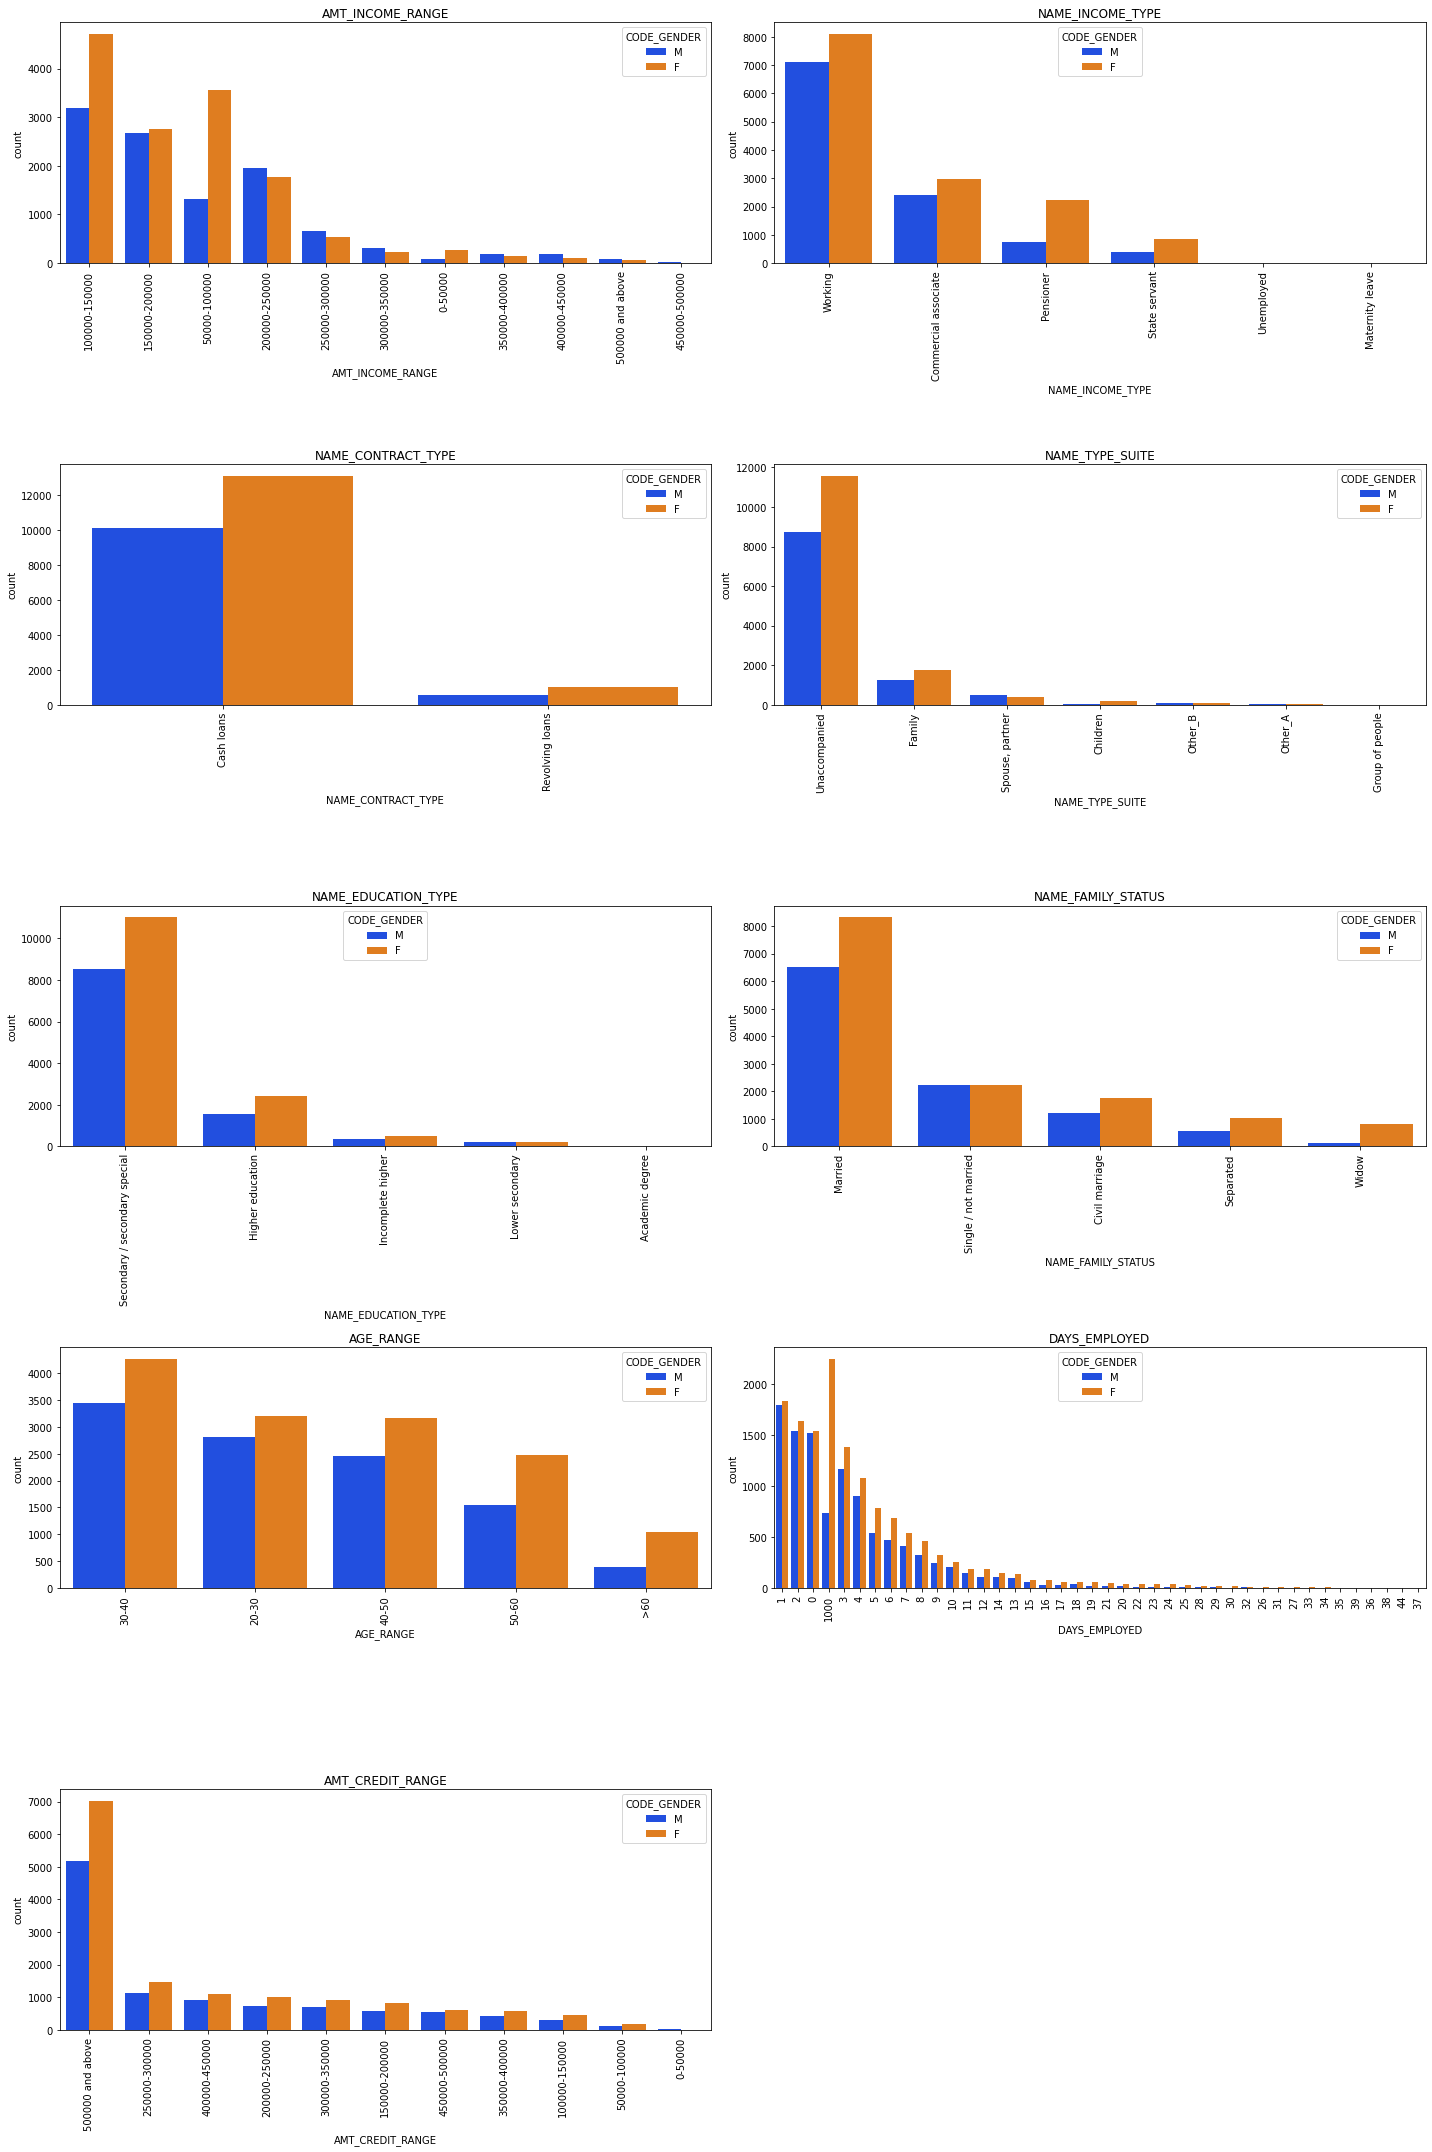

In [64]:
Required_columns= ['AMT_INCOME_RANGE','NAME_INCOME_TYPE','NAME_CONTRACT_TYPE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_RANGE','DAYS_EMPLOYED','AMT_CREDIT_RANGE']
sns.set_palette("bright")

plt.figure(figsize = (20, 30))

for col in enumerate(Required_columns):
    plt.subplot(5, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = target1, x= col[1], order=target1[col[1]].value_counts().index,hue = 'CODE_GENDER') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

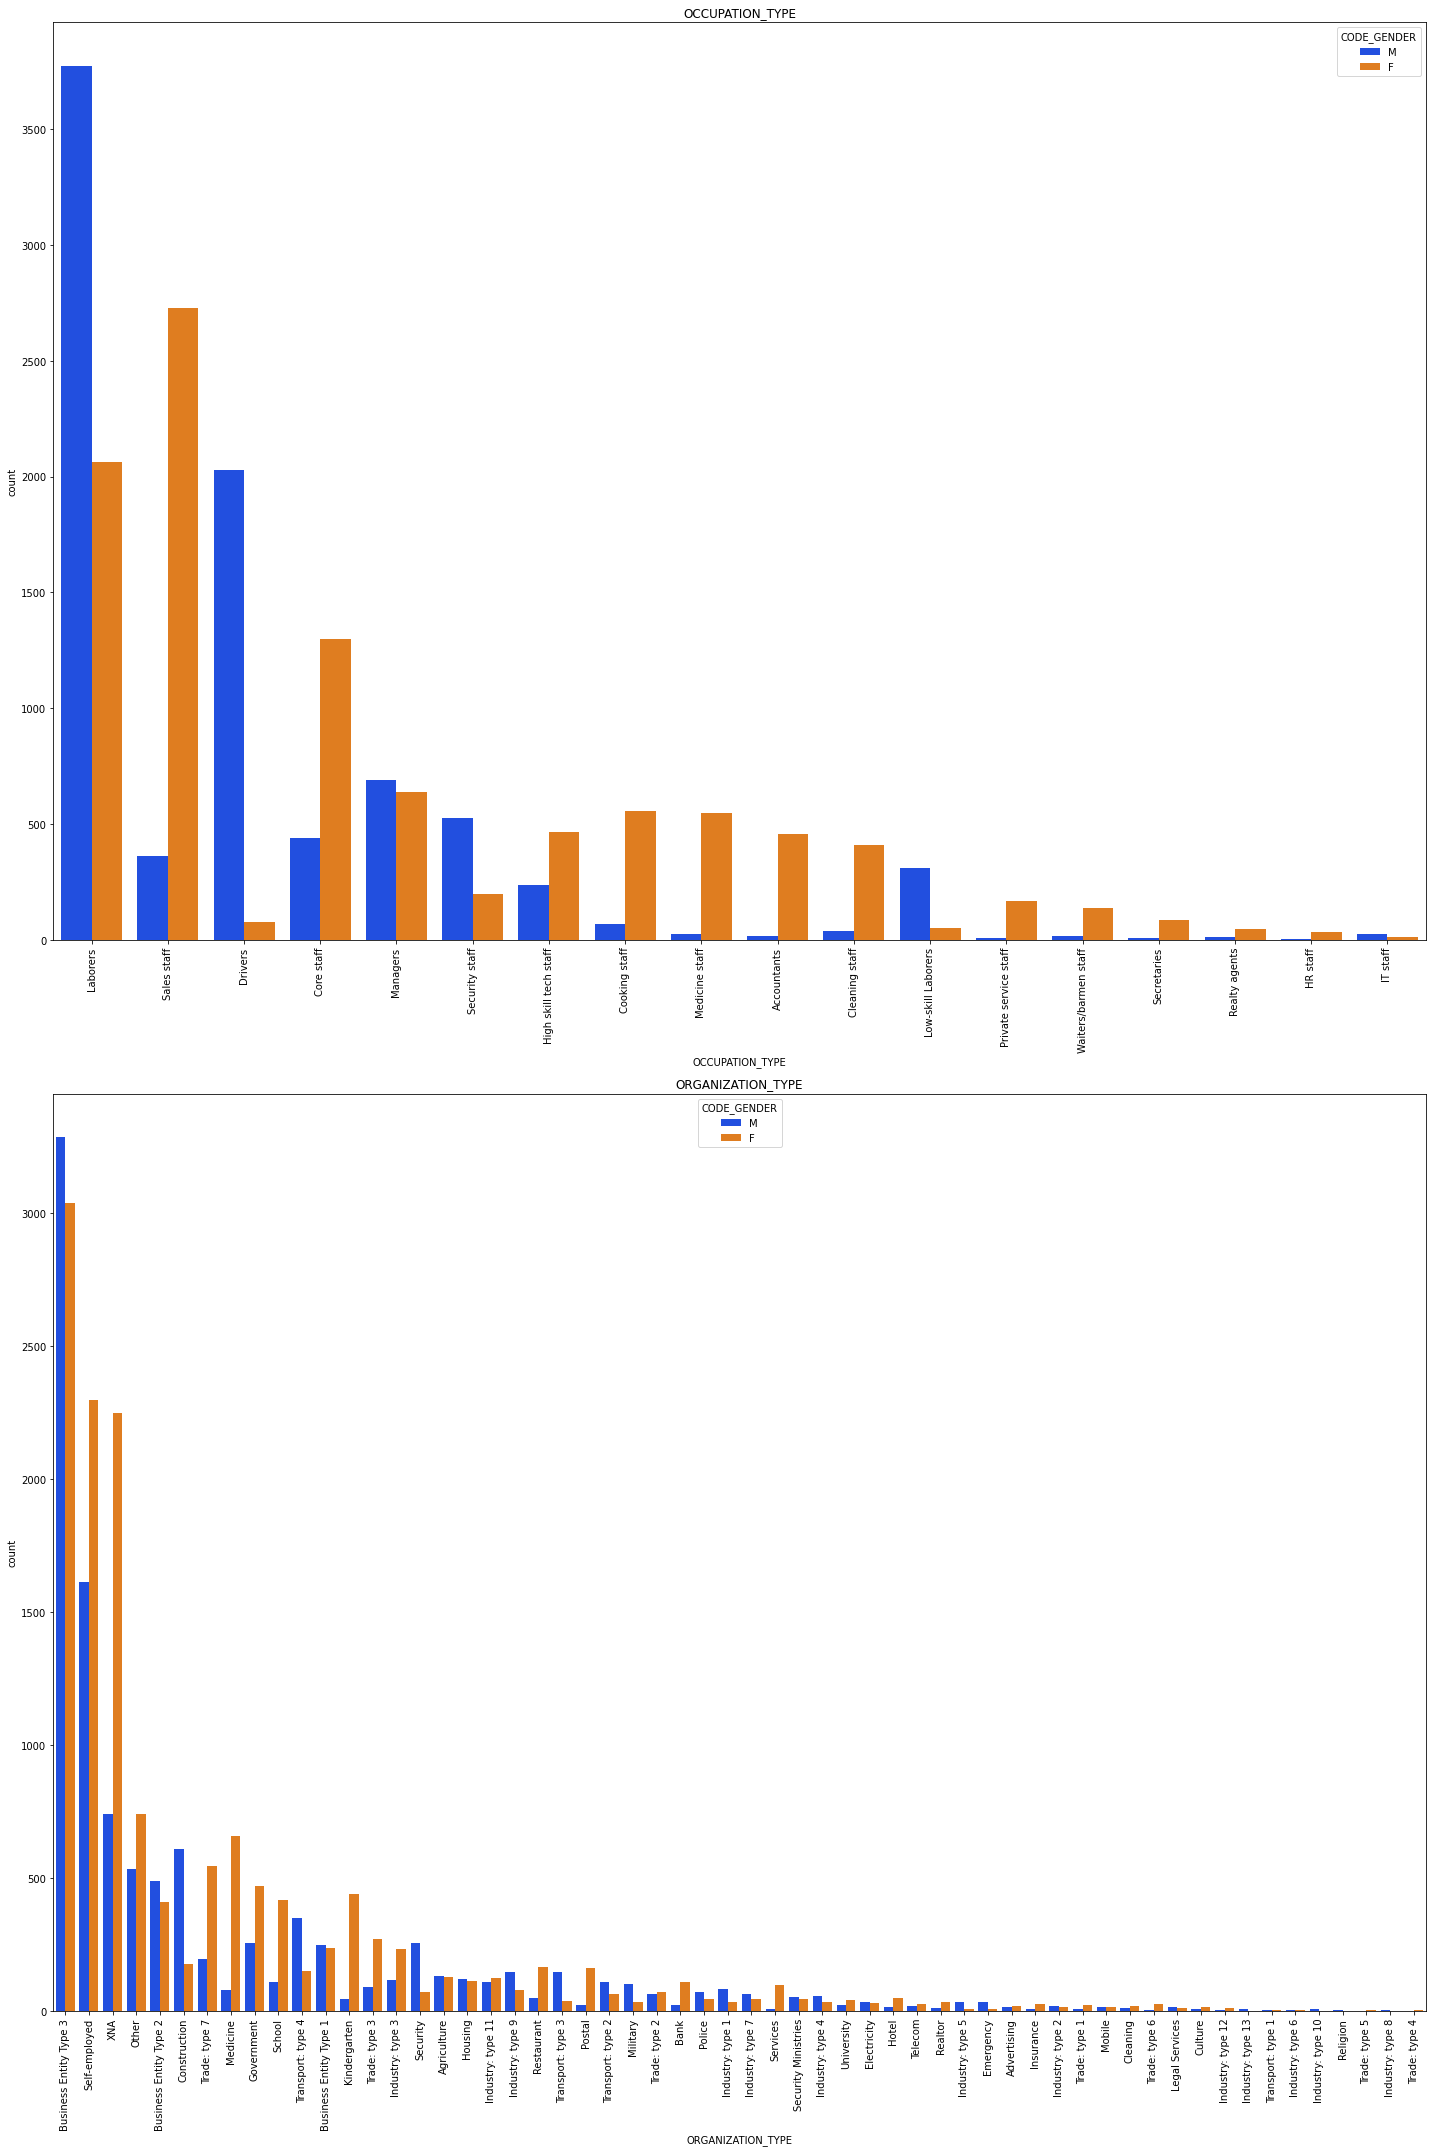

In [65]:
Required_columns= ['OCCUPATION_TYPE','ORGANIZATION_TYPE']
sns.set_palette("bright")

plt.figure(figsize = (20, 30))

for col in enumerate(Required_columns):
    plt.subplot(2, 1, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = target1, x= col[1], order=target1[col[1]].value_counts().index,hue = 'CODE_GENDER') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

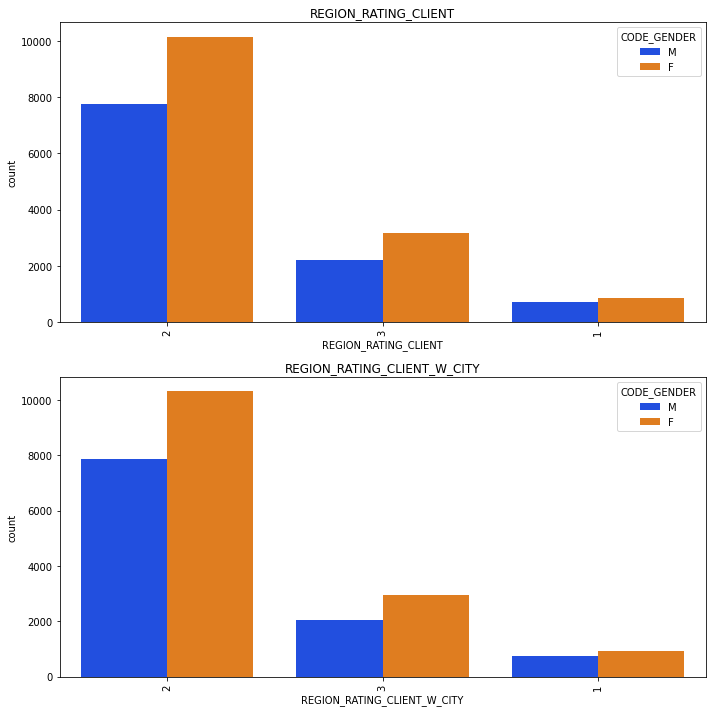

In [66]:
Required_columns= ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']
sns.set_palette("bright")

plt.figure(figsize = (10, 10))

for col in enumerate(Required_columns):
    plt.subplot(2, 1, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = target1, x= col[1], order=target1[col[1]].value_counts().index,hue = 'CODE_GENDER') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

##  UNIVARIATE ANALYSIS - TARGET 0

In [67]:
100*target0['CODE_GENDER'].value_counts(normalize='True')

F     66.6032
M     33.3954
XNA    0.0014
Name: CODE_GENDER, dtype: float64

We can see that Female ratio is high in the people with no payment issue

In [68]:
100*target0['NAME_EDUCATION_TYPE'].value_counts(normalize='True')

Secondary / secondary special   70.3491
Higher education                25.0646
Incomplete higher                3.3270
Lower secondary                  1.2024
Academic degree                  0.0570
Name: NAME_EDUCATION_TYPE, dtype: float64

We can see that people who dont have difficulties in paying loan amount are majorly completed secondary education


In [69]:
100*target0['NAME_HOUSING_TYPE'].value_counts(normalize='True')

House / apartment     89.0019
With parents           4.6355
Municipal apartment    3.6181
Rented apartment       1.5140
Office apartment       0.8649
Co-op apartment        0.3654
Name: NAME_HOUSING_TYPE, dtype: float64

We can see that people are majorly living in house/apartment

In [70]:
100*target0['FLAG_OWN_CAR'].value_counts(normalize='True')

N   65.6824
Y   34.3176
Name: FLAG_OWN_CAR, dtype: float64

We can see that people who dont have difficulties in paying loan amount also mostly dont own a car

In [71]:
100*target0['FLAG_OWN_REALTY'].value_counts(normalize='True')

Y   69.4513
N   30.5487
Name: FLAG_OWN_REALTY, dtype: float64

We can see that people who dont have difficulties in paying loan amount also mostly own a house

In [72]:
100*target0['NAME_FAMILY_STATUS'].value_counts(normalize='True')

Married                64.2345
Single / not married   14.4991
Civil marriage          9.4854
Separated               6.4206
Widow                   5.3597
Unknown                 0.0007
Name: NAME_FAMILY_STATUS, dtype: float64

In [73]:
100*target0['CNT_CHILDREN'].value_counts(normalize='True')

0    70.3119
1    19.6915
2     8.6371
3     1.1882
4     0.1323
5     0.0272
6     0.0053
7     0.0025
14    0.0011
8     0.0007
10    0.0007
12    0.0007
19    0.0007
Name: CNT_CHILDREN, dtype: float64

We can see that people who dont have difficulties in paying loan amount also mostly are married and have no child

In [74]:
100*target0['NAME_INCOME_TYPE'].value_counts(normalize='True')

Working                50.7807
Commercial associate   23.4384
Pensioner              18.5294
State servant           7.2356
Student                 0.0064
Unemployed              0.0050
Businessman             0.0035
Maternity leave         0.0011
Name: NAME_INCOME_TYPE, dtype: float64

We can see that people who dont have difficulties in paying loan amount also majorly falls in working category

In [75]:
100*target0['OCCUPATION_TYPE'].value_counts(normalize='True')

Laborers                25.6256
Sales staff             15.0644
Core staff              13.4141
Managers                10.4080
Drivers                  8.5661
High skill tech staff    5.5454
Accountants              4.8496
Medicine staff           4.1361
Security staff           3.1152
Cooking staff            2.7652
Cleaning staff           2.1841
Private service staff    1.2863
Low-skill Laborers       0.9004
Secretaries              0.6299
Waiters/barmen staff     0.6211
Realty agents            0.3593
HR staff                 0.2737
IT staff                 0.2555
Name: OCCUPATION_TYPE, dtype: float64

We can see that people who are laborers having dont have difficulties in paying loan.


In [76]:
100*target0['ORGANIZATION_TYPE'].value_counts(normalize='True')

Business Entity Type 3   21.8154
XNA                      18.5308
Self-employed            12.2058
Other                     5.4506
Medicine                  3.6988
Government                3.4236
Business Entity Type 2    3.4147
School                    2.9598
Trade: type 7             2.5084
Kindergarten              2.2626
Construction              2.0999
Business Entity Type 1    1.9446
Transport: type 4         1.7323
Industry: type 9          1.1118
Trade: type 3             1.1076
Industry: type 3          1.0365
Security                  1.0340
Housing                   0.9633
Military                  0.8840
Industry: type 11         0.8738
Bank                      0.8409
Police                    0.7867
Agriculture               0.7772
Transport: type 2         0.7188
Postal                    0.6987
Security Ministries       0.6643
Trade: type 2             0.6251
Restaurant                0.5656
Services                  0.5204
University                0.4464
Industry: 

We can see Business Entity Type 3 has highest percentage among target0


In [77]:
100*target0['REGION_RATING_CLIENT'].value_counts(normalize='True')

2   73.9609
3   15.1985
1   10.8407
Name: REGION_RATING_CLIENT, dtype: float64

In [78]:
100*target0['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize='True')

2   74.7522
3   13.7463
1   11.5015
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

We can see that target0 majorly resides in region with ratings 2(with or without taking city into account)

#### Univariate analysis of target0 for categorical variables

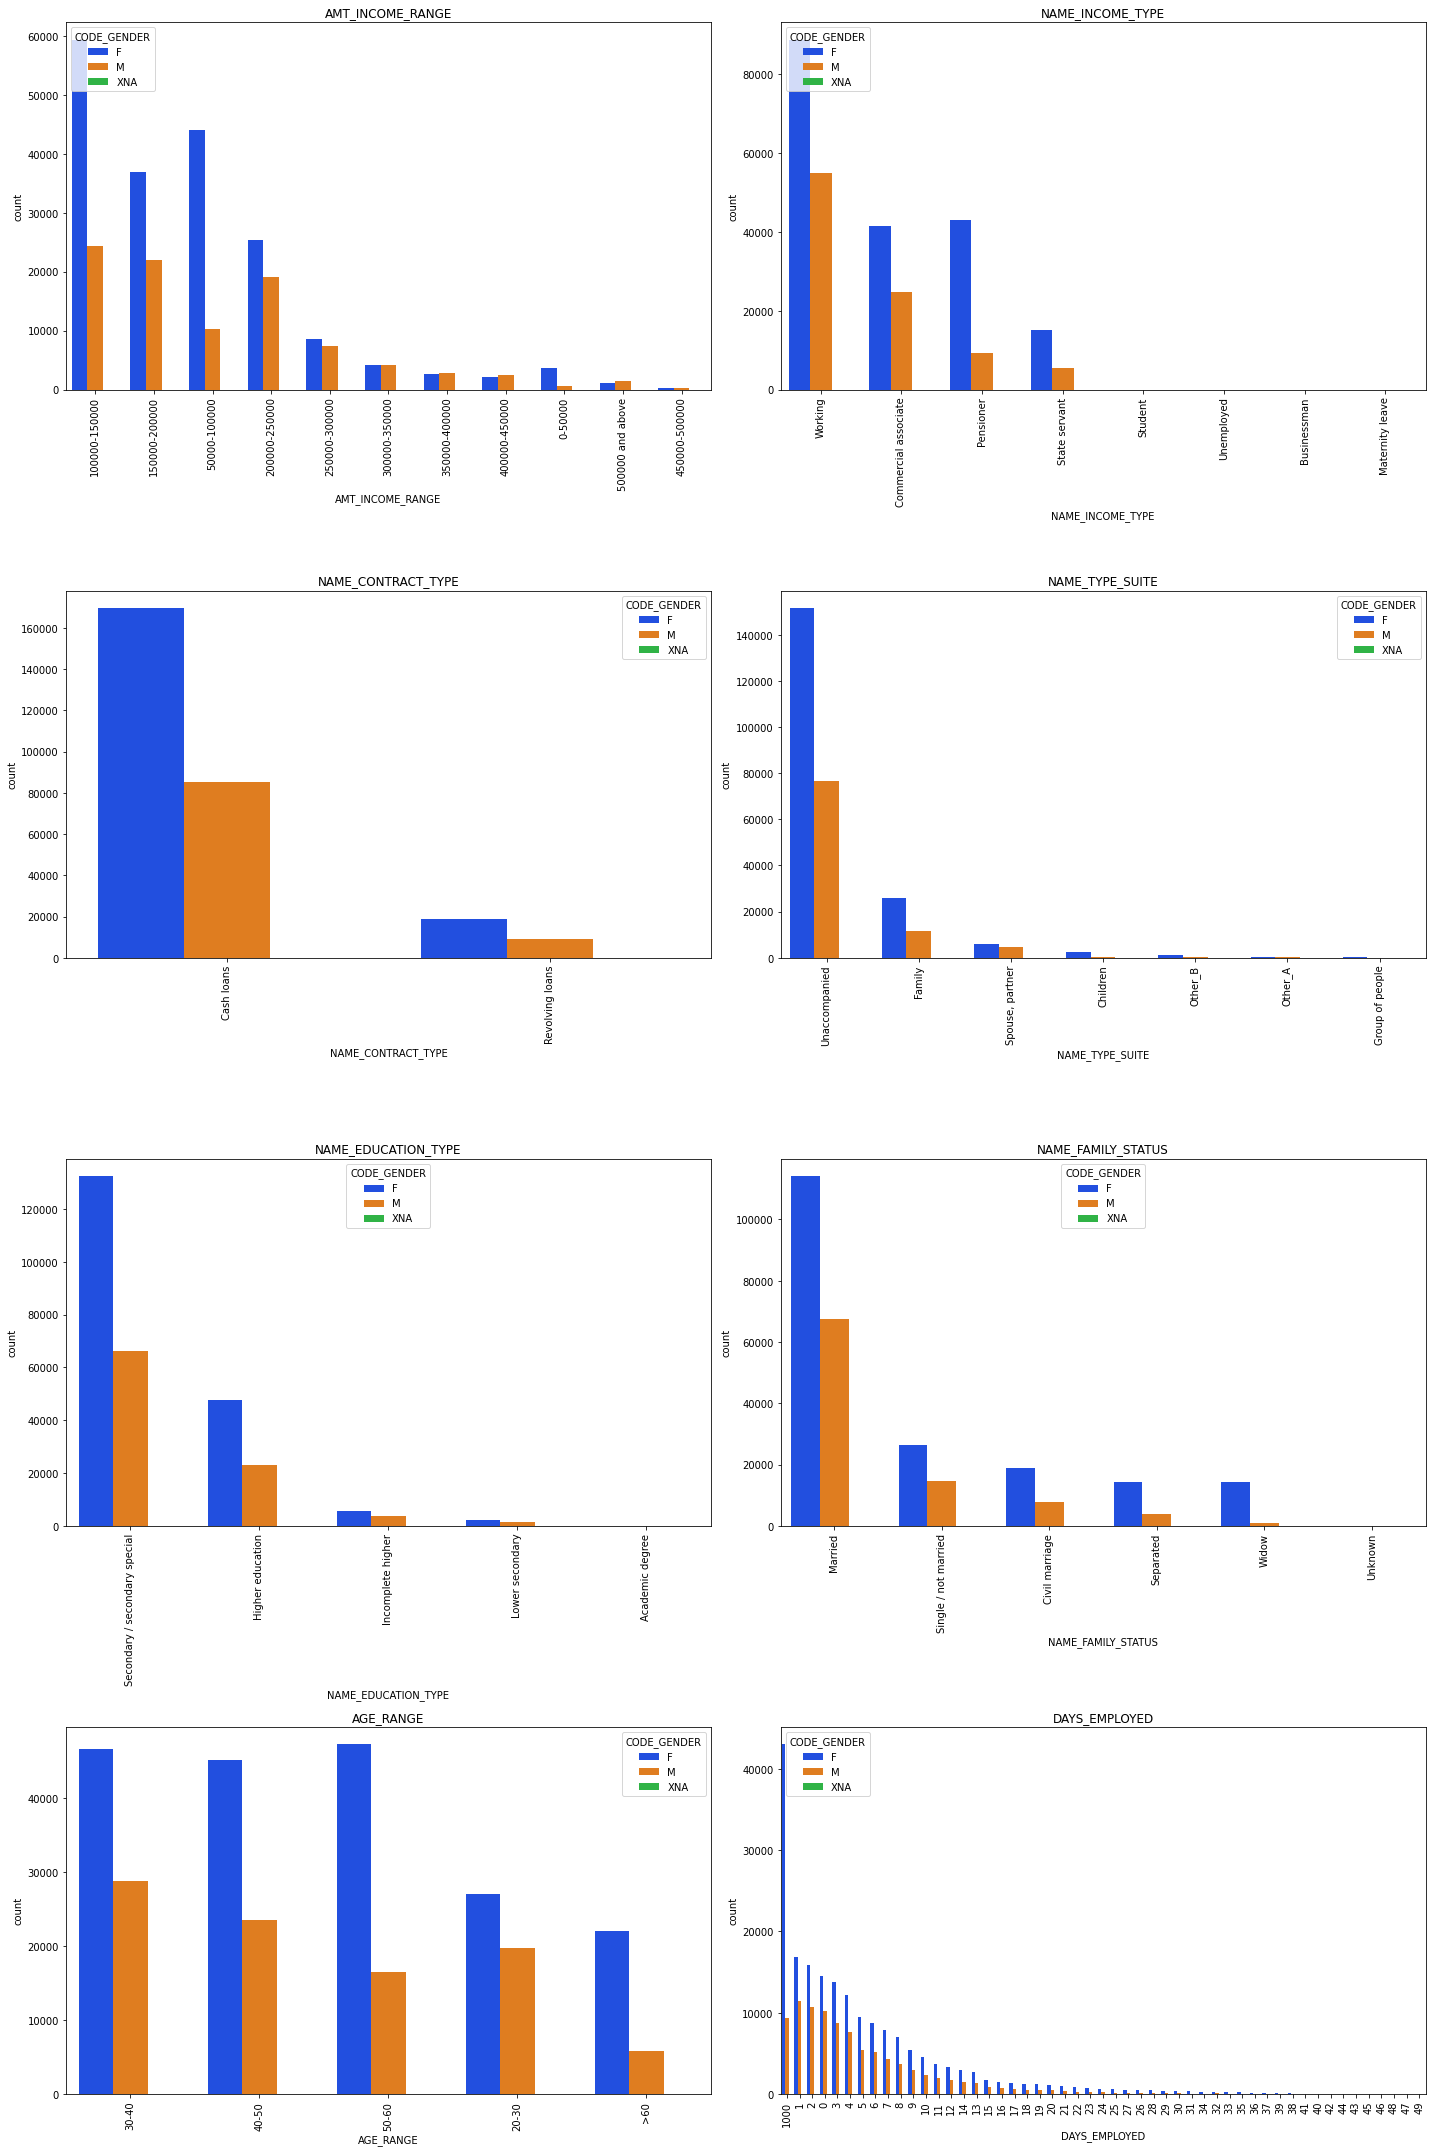

In [79]:
Required_columns= ['AMT_INCOME_RANGE','NAME_INCOME_TYPE','NAME_CONTRACT_TYPE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_RANGE','DAYS_EMPLOYED']
sns.set_palette("bright")

plt.figure(figsize = (20, 30))

for col in enumerate(Required_columns):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = target0, x= col[1], order=target0[col[1]].value_counts().index,hue = 'CODE_GENDER') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

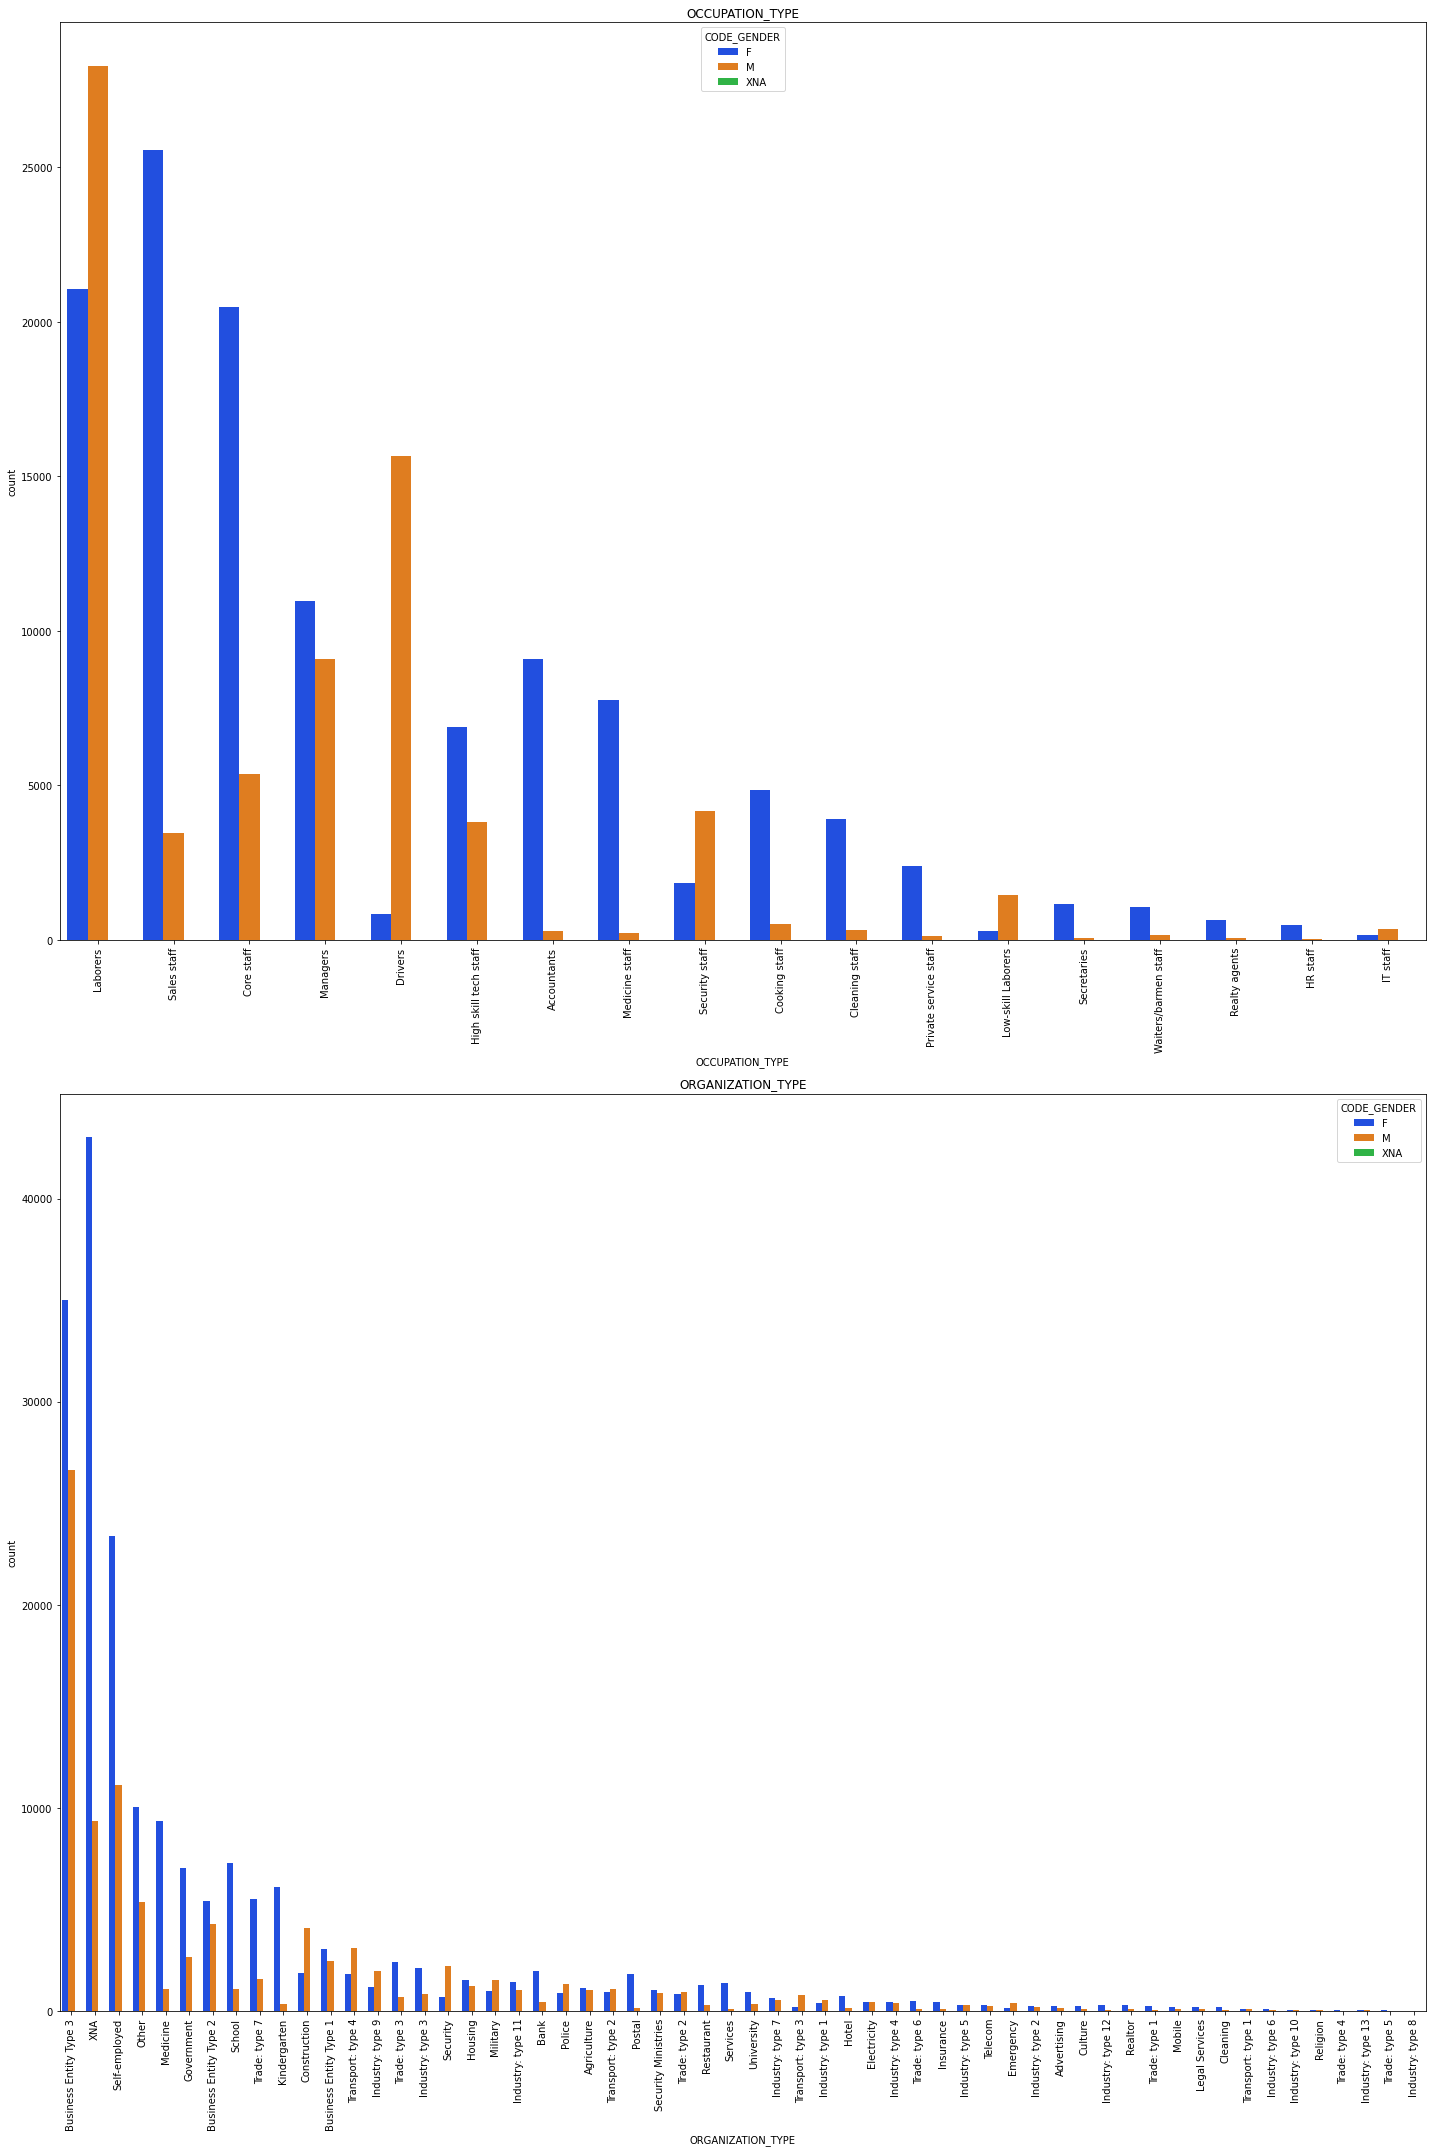

In [80]:
Required_columns= ['OCCUPATION_TYPE','ORGANIZATION_TYPE']
sns.set_palette("bright")

plt.figure(figsize = (20, 30))

for col in enumerate(Required_columns):
    plt.subplot(2, 1, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = target0, x= col[1], order=target0[col[1]].value_counts().index,hue = 'CODE_GENDER') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

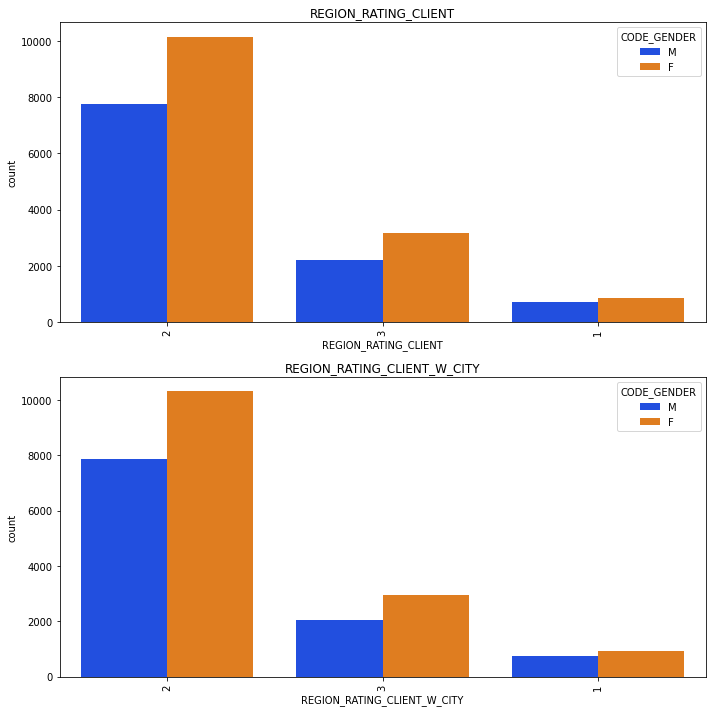

In [81]:
Required_columns= ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']
sns.set_palette("bright")

plt.figure(figsize = (10, 10))

for col in enumerate(Required_columns):
    plt.subplot(2, 1, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = target1, x= col[1], order=target1[col[1]].value_counts().index,hue = 'CODE_GENDER') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

**We can see the Target0 also have more or less have same pattern as Target1.**




##### CATEGORICAL VARIABLES - PLOTTING FOR THE ENTIRE APPLICATION_DATA.CSV W.R.T TARGET COLUMN.

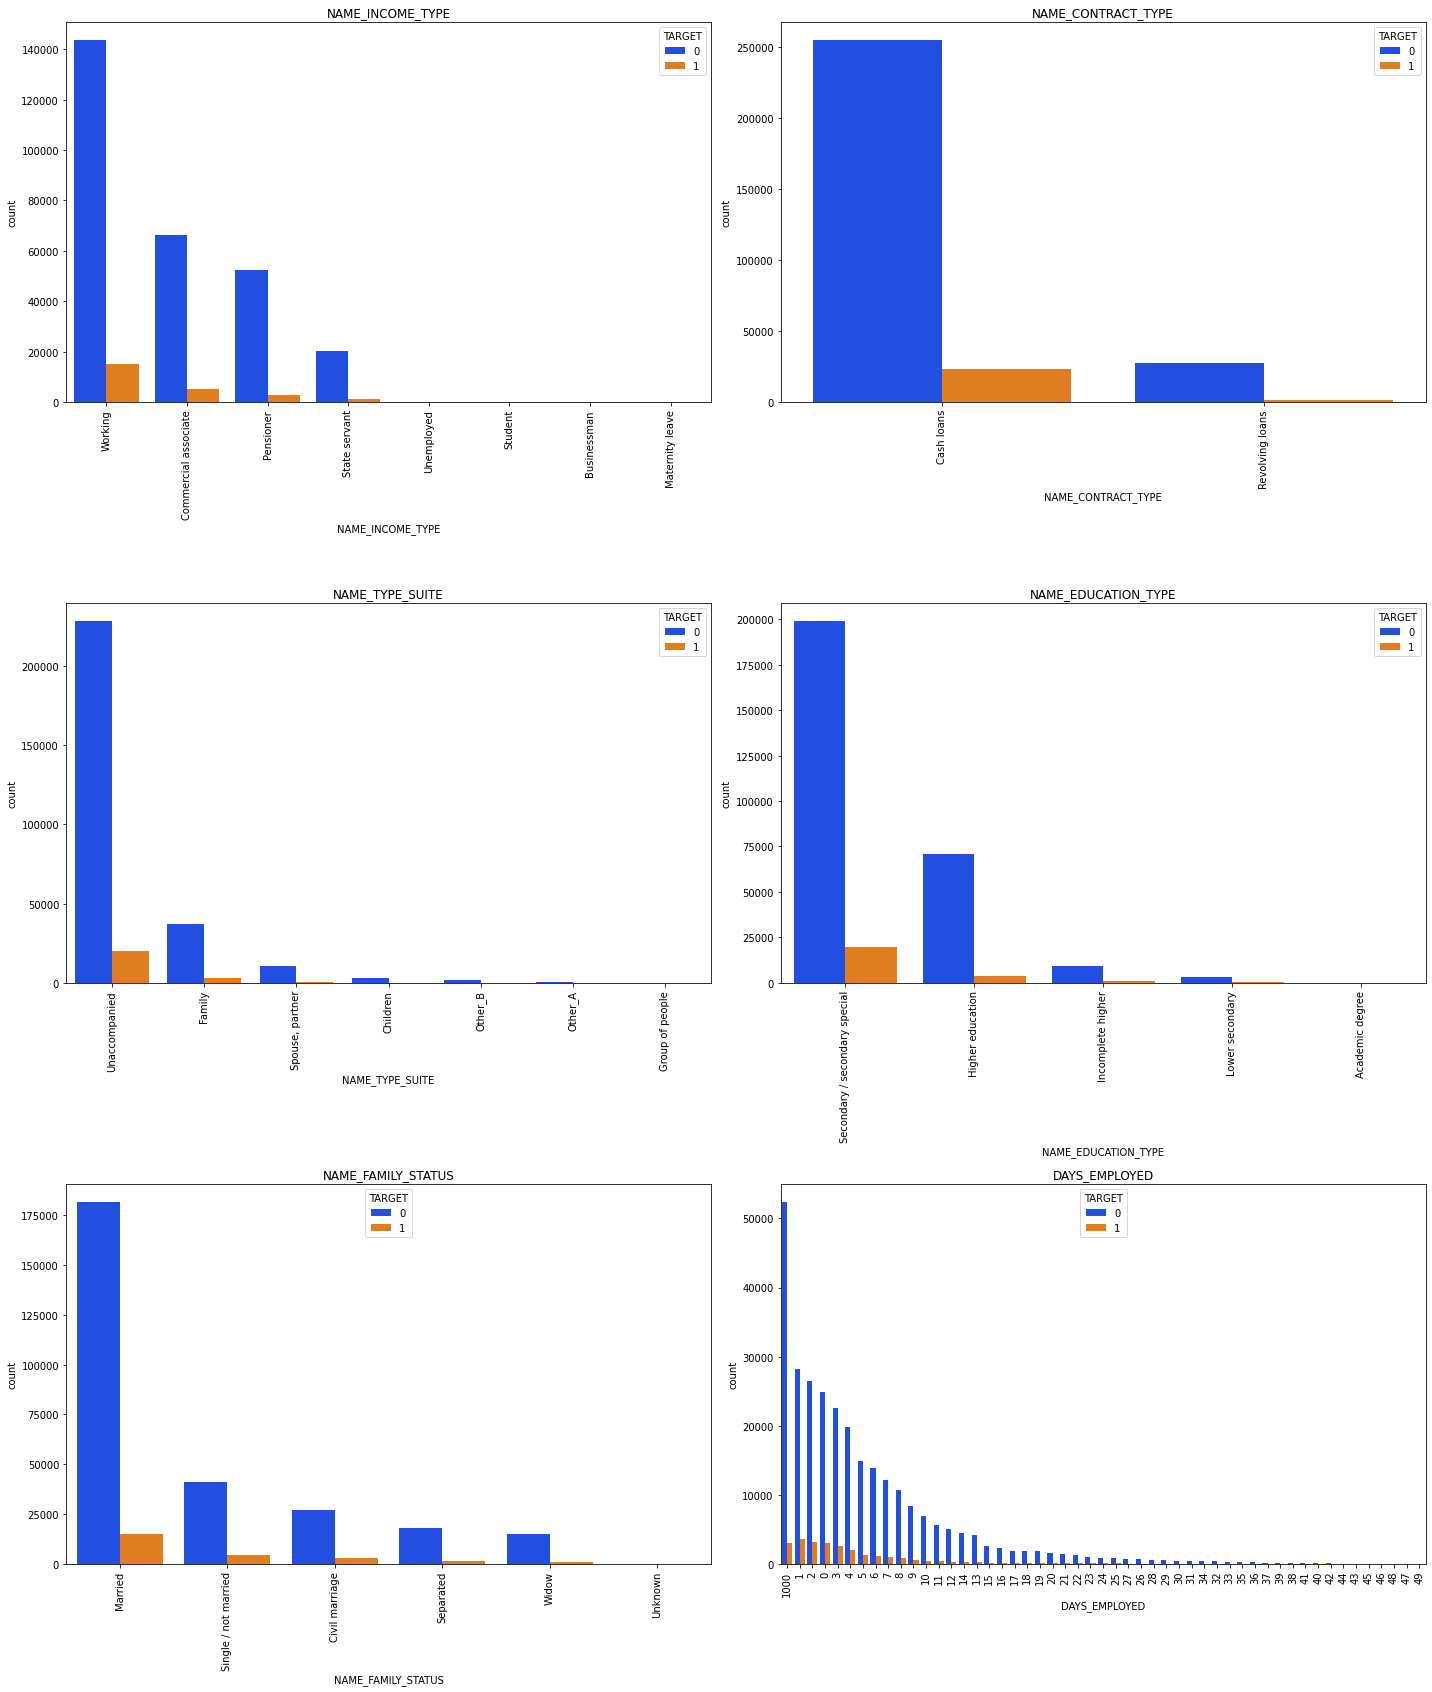

In [82]:
Required_columns= ['NAME_INCOME_TYPE','NAME_CONTRACT_TYPE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','DAYS_EMPLOYED']
sns.set_palette("bright")

plt.figure(figsize = (20, 30))

for col in enumerate(Required_columns):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = dfApp, x= col[1], order=dfApp[col[1]].value_counts().index,hue = 'TARGET') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

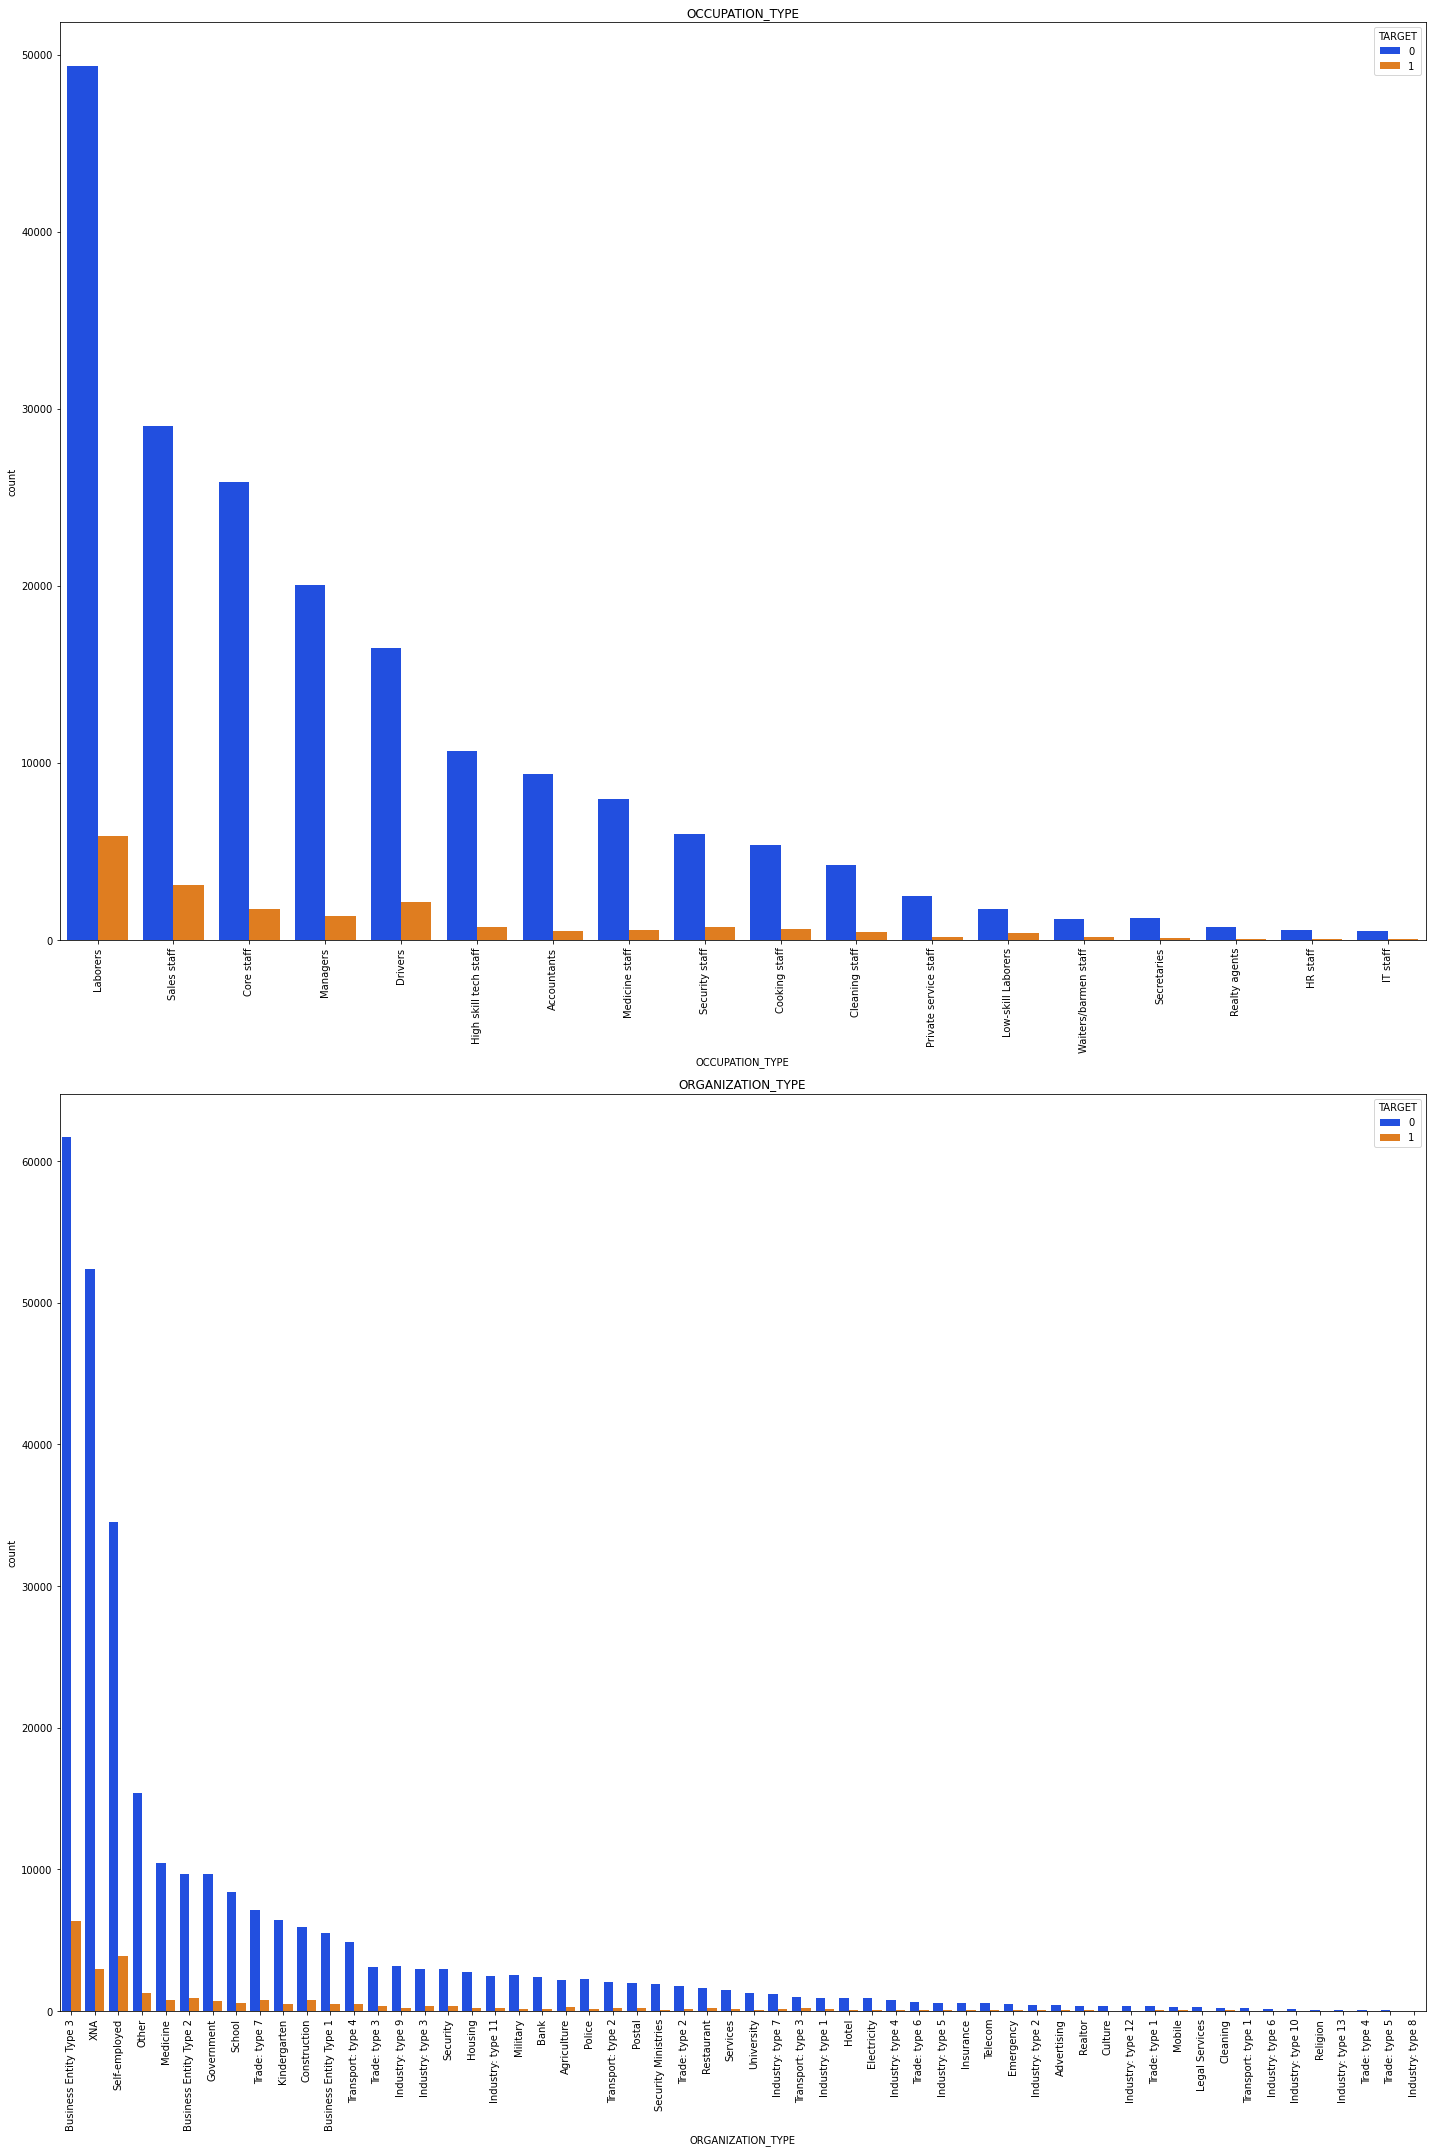

In [83]:
Required_columns= ['OCCUPATION_TYPE','ORGANIZATION_TYPE']
sns.set_palette("bright")

plt.figure(figsize = (20, 30))

for col in enumerate(Required_columns):
    plt.subplot(2, 1, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = dfApp, x= col[1], order=dfApp[col[1]].value_counts().index,hue = 'TARGET') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

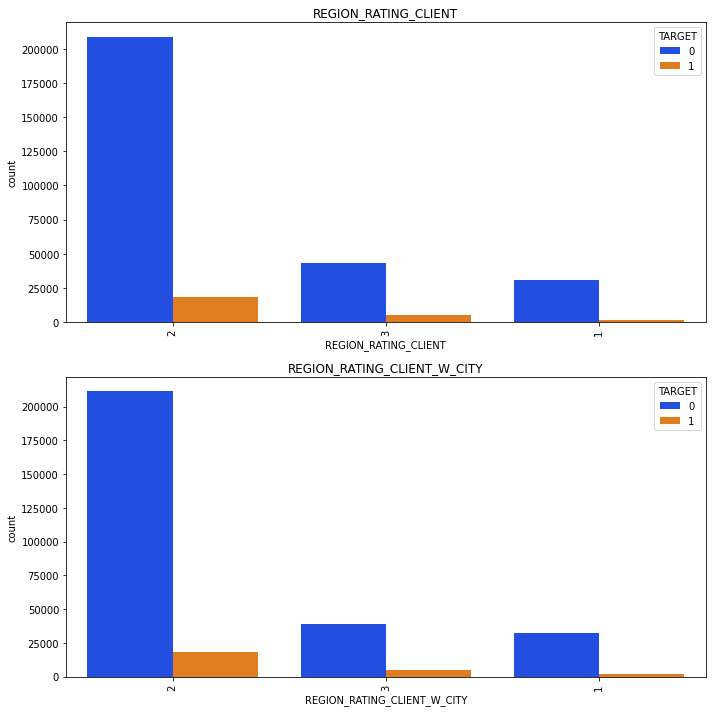

In [84]:
Required_columns= ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']
sns.set_palette("bright")

plt.figure(figsize = (10, 10))

for col in enumerate(Required_columns):
    plt.subplot(2, 1, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = dfApp, x= col[1], order=dfApp[col[1]].value_counts().index,hue = 'TARGET') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

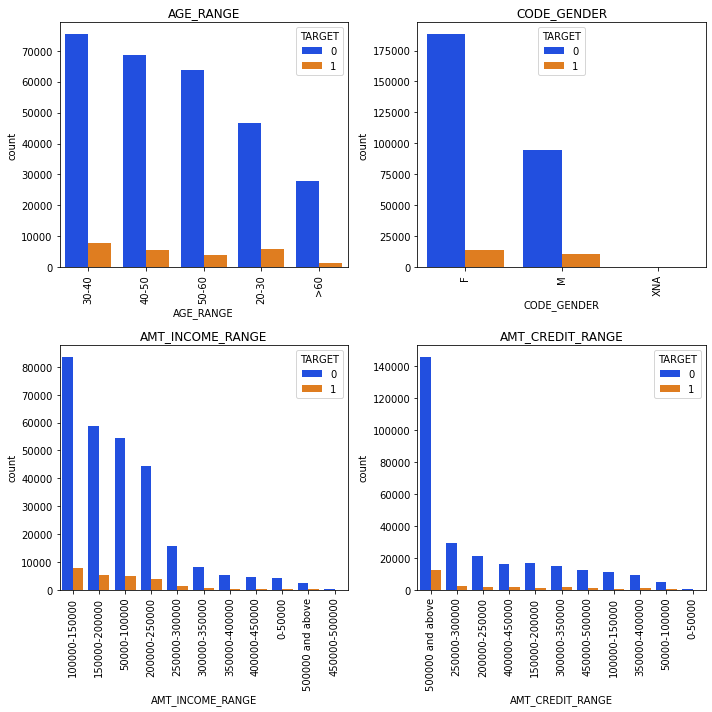

In [85]:
Required_columns= ['AGE_RANGE','CODE_GENDER', 'AMT_INCOME_RANGE','AMT_CREDIT_RANGE']
sns.set_palette("bright")

plt.figure(figsize = (10, 10))

for col in enumerate(Required_columns):
    plt.subplot(2, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = dfApp, x= col[1], order=dfApp[col[1]].value_counts().index,hue = 'TARGET') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

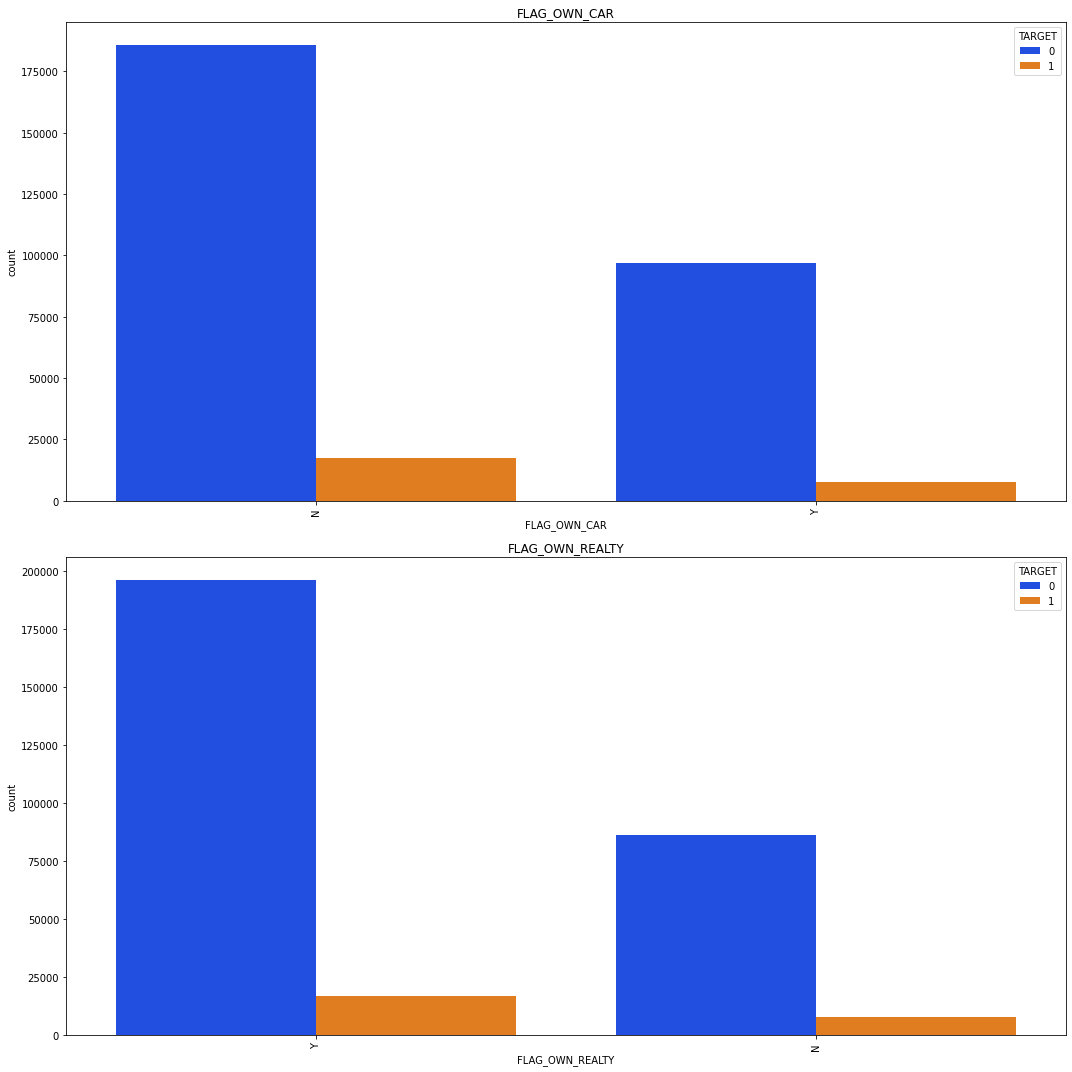

In [86]:
Required_columns= ['FLAG_OWN_CAR','FLAG_OWN_REALTY']
sns.set_palette("bright")

plt.figure(figsize = (15, 15))

for col in enumerate(Required_columns):
    plt.subplot(2, 1, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = dfApp, x= col[1], order=dfApp[col[1]].value_counts().index,hue = 'TARGET') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

 **When we perform univariate analysis on the complete dataframe without splitting into target 1 and target 0 , we get the following insights**: 
**People with less payment difficulties are found to be present in these categories:**

*   **Working Class**
*   **People who apply for Cash loan**s
*   **People who are unaccompanied when they visit the bank.**
*   **People with secondary/secondary special education.**
*   **People who are married.**
*   **Work experience with around 2-3 years.**
*   **People owning a Business Entity.**
*   **People who come under Labor class in Occupation type.**
*   **The rating of region with/without city where the client is residing is found to be 2.**
*   **Age-Range : 30-40**
*  **Amount Income range : 100000 - 150000 and Amt_Credit Range = 500000 and above.**
*   **Females**



## CONTINUOUS VARIABLES - PLOTTING FOR THE ENTIRE APPLICATION_DATA.CSV W.R.T TARGET COLUMN.

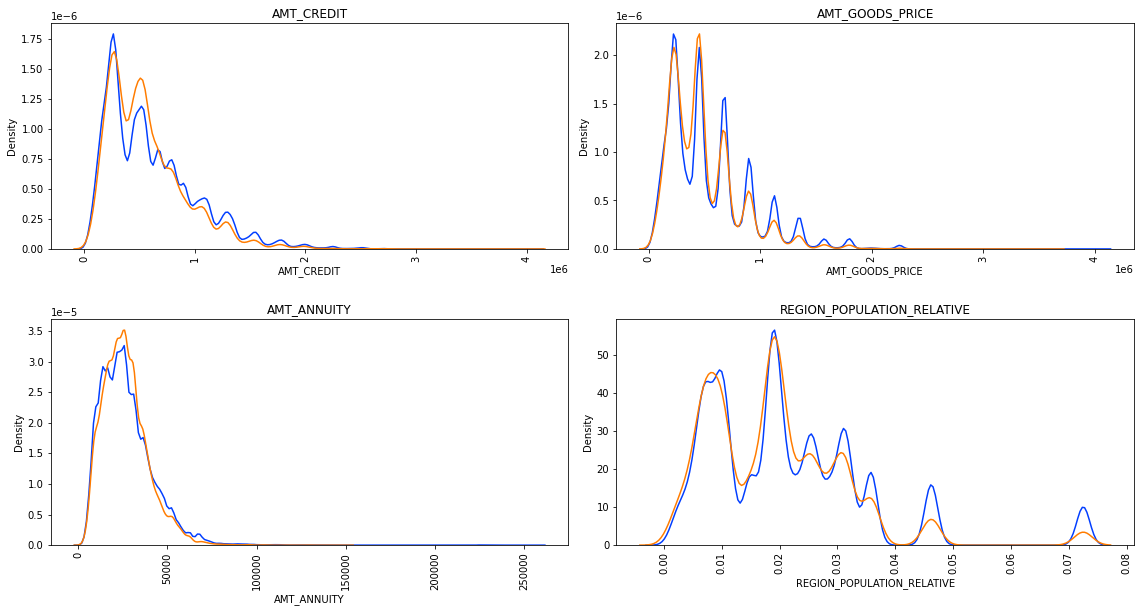

In [87]:
Required_columns= ['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','REGION_POPULATION_RELATIVE']

sns.set_palette("bright")

plt.figure(figsize = (16, 16))

for col in enumerate(Required_columns):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    sns.distplot(target0[col[1]], hist =False) #BLUE
    sns.distplot(target1[col[1]], hist =False) #ORANGE
    plt.tight_layout()
    plt.xticks(rotation = 90)


In [88]:
dfApp.AMT_ANNUITY.describe()

count   307499.0000
mean     27108.5739
std      14493.7373
min       1615.5000
25%      16524.0000
50%      24903.0000
75%      34596.0000
max     258025.5000
Name: AMT_ANNUITY, dtype: float64

In [89]:
dfApp.AMT_CREDIT.describe()

count    307511.0000
mean     599025.9997
std      402490.7770
min       45000.0000
25%      270000.0000
50%      513531.0000
75%      808650.0000
max     4050000.0000
Name: AMT_CREDIT, dtype: float64

In [90]:
dfApp.AMT_GOODS_PRICE.describe()

count    307233.0000
mean     538396.2074
std      369446.4605
min       40500.0000
25%      238500.0000
50%      450000.0000
75%      679500.0000
max     4050000.0000
Name: AMT_GOODS_PRICE, dtype: float64

In [91]:
dfApp.REGION_POPULATION_RELATIVE.describe()

count   307511.0000
mean         0.0209
std          0.0138
min          0.0003
25%          0.0100
50%          0.0188
75%          0.0287
max          0.0725
Name: REGION_POPULATION_RELATIVE, dtype: float64

 **When we perform univariate analysis on the complete dataframe w.r.t numerical variables without splitting into target 1 and target 0 , we get the following insights**: 
**People with less payment difficulties are found to be present in these categories:**

*   **Mean population desnsity is found to be 0.02 with max being 0.07**
*   **Mean AMT_GOODS_PRICE is found to be 538396 with max being 4050000**
*   **Mean AMT_CREDIT is found to be 5999025 with max being 4050000**
*   **Mean AMT_ANNUITY is found to be 27108 with max being 258025**



## BIVARIATE ANALYSIS

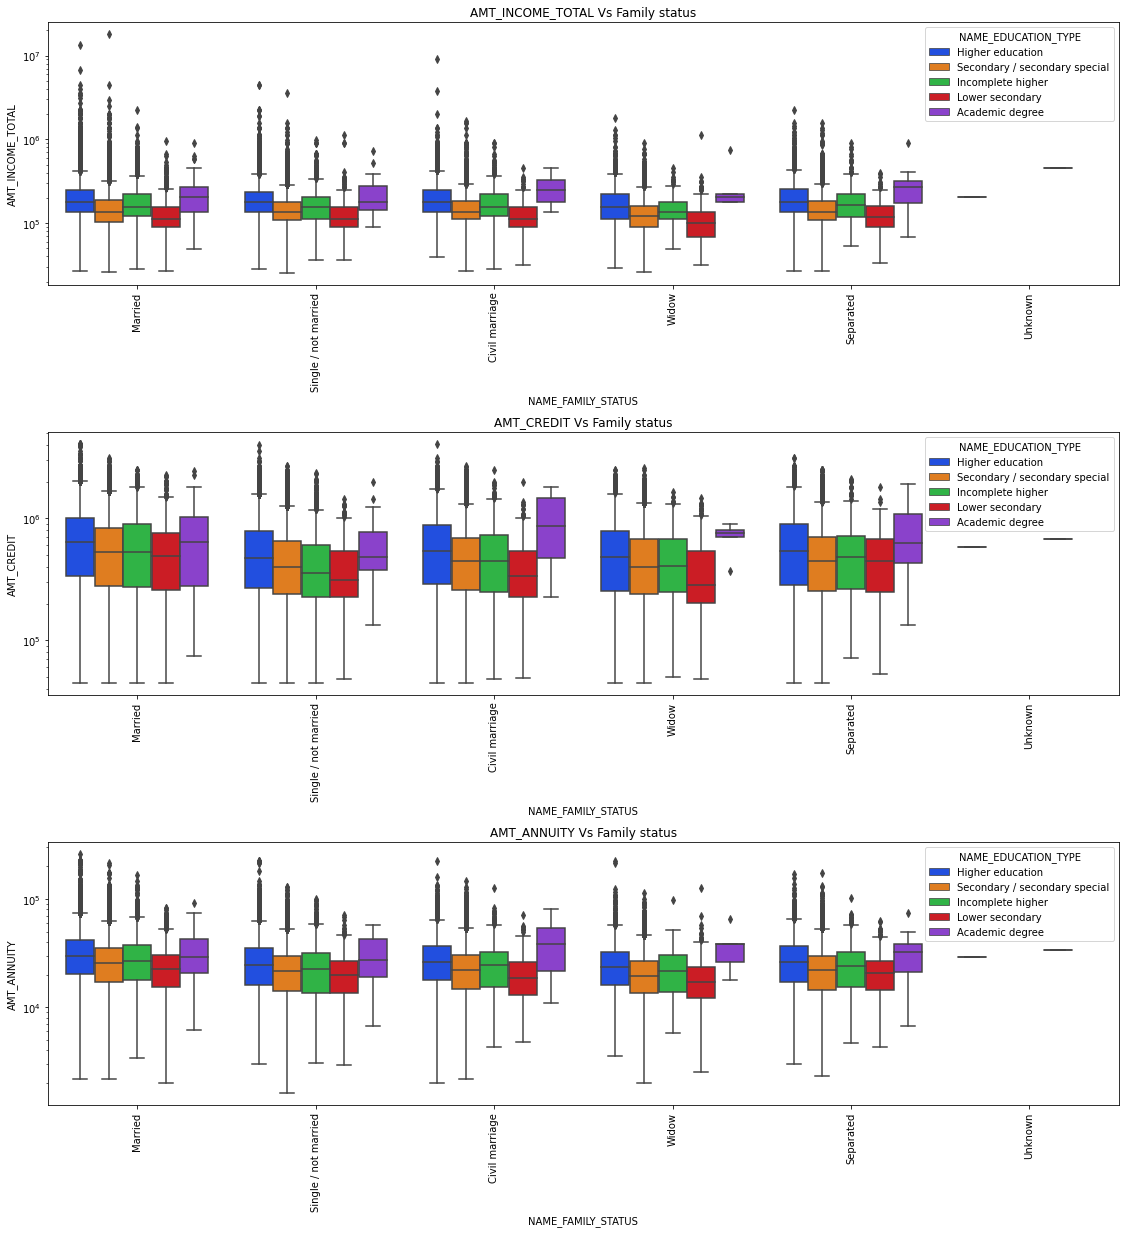

In [92]:
Required_columns= ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']
sns.set_palette("bright")

plt.figure(figsize = (16, 16))

for col in enumerate(Required_columns):
    plt.subplot(3, 1, col[0]+1)
    plt.title(col[1]+ " Vs Family status")
    sns.boxplot(data =target0, x='NAME_FAMILY_STATUS',y=col[1], hue ='NAME_EDUCATION_TYPE')
    plt.tight_layout()
    plt.yscale('log')
    plt.xticks(rotation = 90)

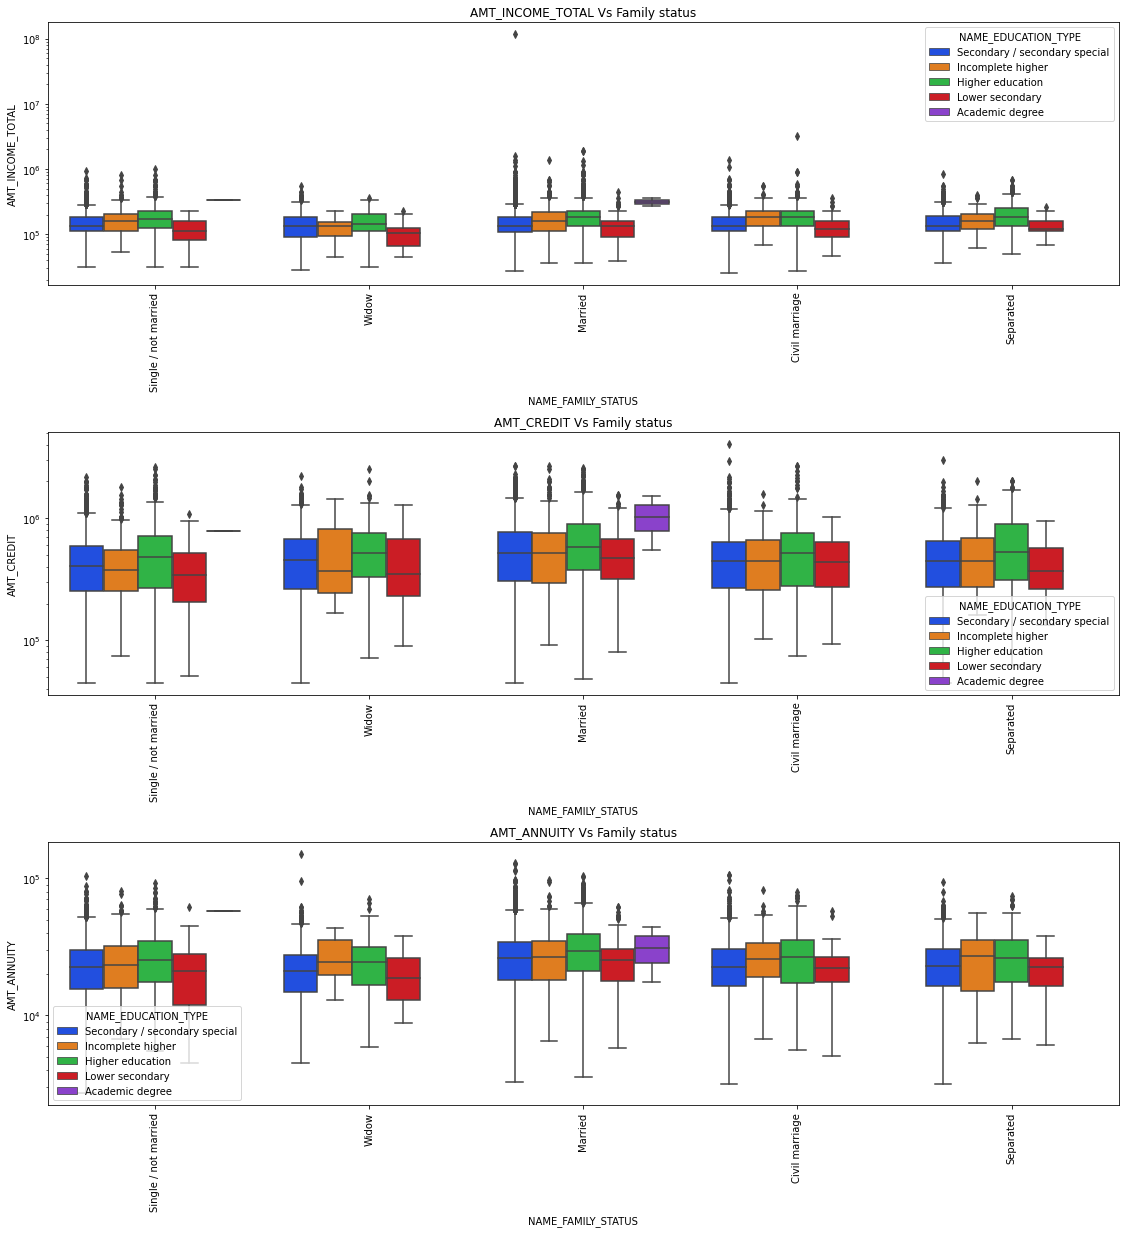

In [93]:
Required_columns= ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']
sns.set_palette("bright")

plt.figure(figsize = (16, 16))

for col in enumerate(Required_columns):
    plt.subplot(3, 1, col[0]+1)
    plt.title(col[1]+ " Vs Family status")
    sns.boxplot(data =target1, x='NAME_FAMILY_STATUS',y=col[1], hue ='NAME_EDUCATION_TYPE')
    plt.tight_layout()
    plt.yscale('log')
    plt.xticks(rotation = 90)

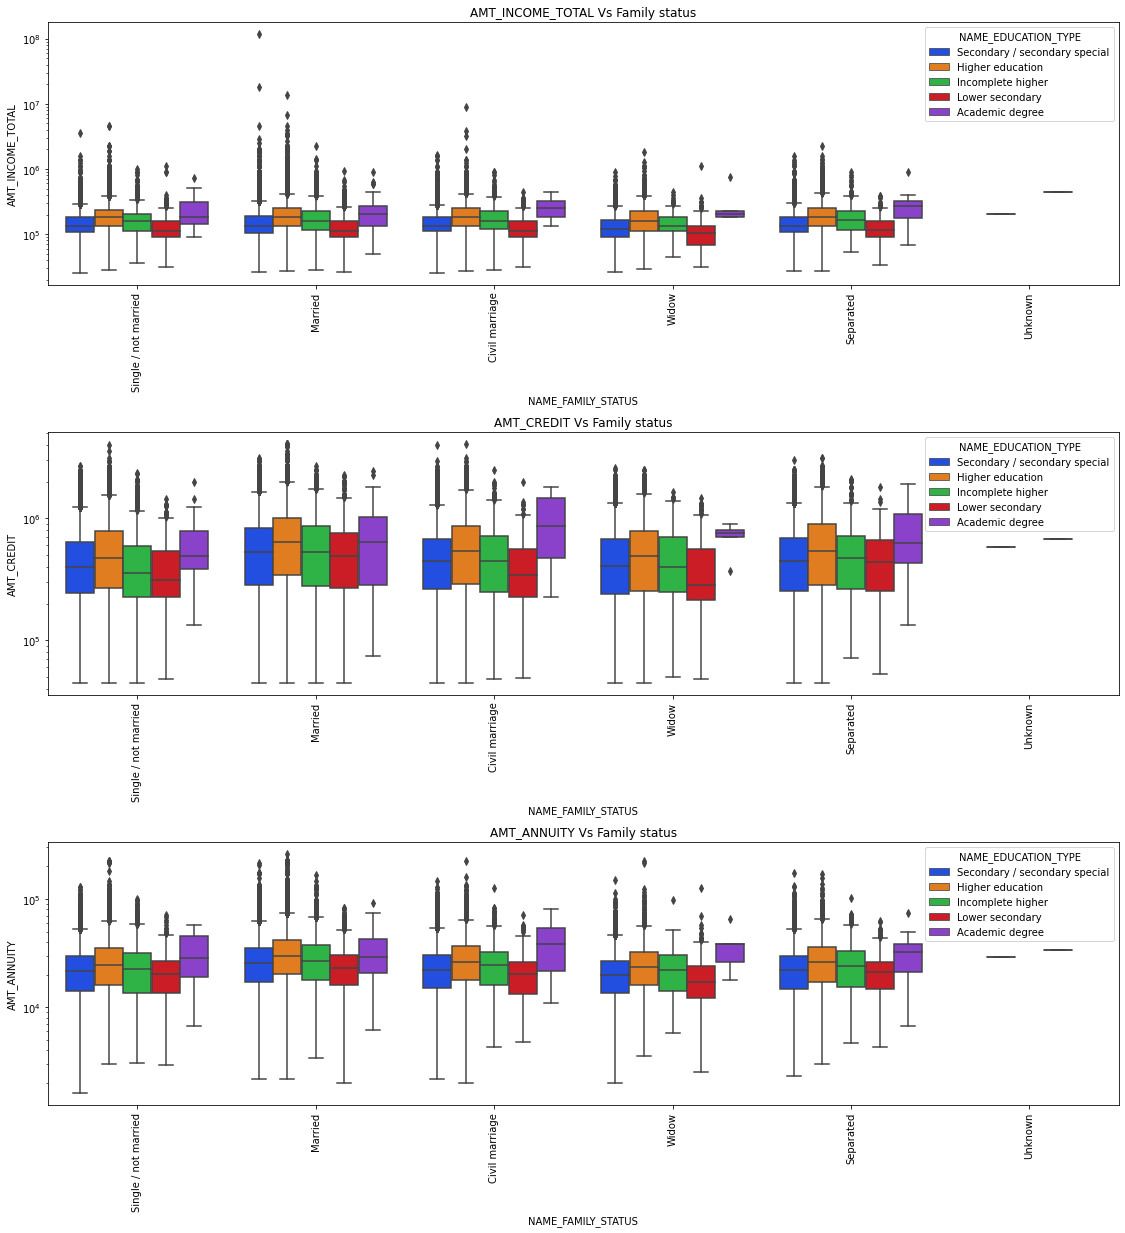

In [94]:
Required_columns= ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']
sns.set_palette("bright")

plt.figure(figsize = (16, 16))

for col in enumerate(Required_columns):
    plt.subplot(3, 1, col[0]+1)
    plt.title(col[1]+ " Vs Family status")
    sns.boxplot(data =dfApp, x='NAME_FAMILY_STATUS',y=col[1], hue ='NAME_EDUCATION_TYPE')
    plt.tight_layout()
    plt.yscale('log')
    plt.xticks(rotation = 90)

### Summary for Bivariate Analysis 

Outliers in Income category are more among people who have secondary education and are married.<br>
The Income Mean is higher for academic degree ,higher education in all family_status category.<br>
The credit Mean,Annuity_mean is higher for academic degree,higher education in all family_status category.<br>
For Income varible, majority of the people with family status single and having academic degree occupies 3rd quartile. 
The credit amount mean for married people is mostly greater than any other family status(even civil marriage is considered as married overall)


## CORRELATION 

In [95]:
corr = target0.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)

corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(10)

,VAR1,VAR2,Correlation,Correlation_abs
2207,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.0000,1.0000
800,FLAG_EMP_PHONE,DAYS_EMPLOYED,-1.0000,1.0000
2477,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.0000,1.0000
333,AMT_GOODS_PRICE,AMT_CREDIT,0.9900,0.9900
2140,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.9900,0.9900
2075,FLOORSMAX_MODE,FLOORSMAX_AVG,0.9900,0.9900
2209,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.9900,0.9900
2008,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.9700,0.9700
2142,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.9600,0.9600
1272,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.9500,0.9500




*   Highest value of correlation is found in FLOORS_MAX AND FLOORSMAX_AVG; FLAG_EMP_PHONE AND DAYS_EMPLOYED ; OBS_60_CNT_SOCIAL_CIRCLE AND OBS_30_CNT_SOCIAL_CIRCLE





In [96]:
corr = target1.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf1 = corr.unstack().reset_index()
corrdf1.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf1.dropna(subset = ['Correlation'], inplace = True)
corrdf1['Correlation'] = round(corrdf1['Correlation'], 2)

corrdf1['Correlation_abs'] = corrdf1['Correlation'].abs()
corrdf1.sort_values(by = 'Correlation_abs', ascending = False).head(10)

,VAR1,VAR2,Correlation,Correlation_abs
2140,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,1.0000,1.0000
2477,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.0000,1.0000
800,FLAG_EMP_PHONE,DAYS_EMPLOYED,-1.0000,1.0000
2207,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.0000,1.0000
2075,FLOORSMAX_MODE,FLOORSMAX_AVG,0.9900,0.9900
2209,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.9900,0.9900
333,AMT_GOODS_PRICE,AMT_CREDIT,0.9800,0.9800
2142,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.9800,0.9800
2008,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.9800,0.9800
1272,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.9600,0.9600


*   Highest value of correlation is found in YEARS_BEGINEXPLUATATION_MEDI AND YEARS_BEGINEXPLUATATION_AVG ; OBS_60_CNT_SOCIAL_CIRCLE AND OBS_30_CNT_SOCIAL_CIRCLE ; FLAG_EMP_PHONE AND DAYS_EMPLOYED; FLOORSMAX_MEDI AND FLOORSMAX_AVG

**The correlation variables are same for both target 0 and target 1 , but the correlation values change.**

# MERGED_DF ANALYSIS 

To merge the data , we choose the inner merge as we focus on the data that are common in both the columns. Even if we choose left merge, it wont affect the data as the columns that are not common will be filled with NA values and it wont add any value to our analysis. Hence, inner merge is the best option.

In [97]:
merged_df=pd.merge(left=dfApp,right=dfPrev,how='inner',on='SK_ID_CURR')

Data Routine Check

In [98]:
print(merged_df.shape)
print(merged_df.SK_ID_CURR.value_counts())

(1413701, 120)
265681    73
173680    72
242412    68
206783    67
389950    64
          ..
281892     1
328973     1
288707     1
341259     1
133697     1
Name: SK_ID_CURR, Length: 291057, dtype: int64


In [99]:
dfApp.shape

(307511, 84)

Here we can see that we concentrate on only 291057 rows that are common between the 2 data frames and we analyse with respect to this data.

In [100]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 120 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: category(4), float64(42), int64(44), object(29), timedelta64[ns](1)
memory usage: 1.2+ GB


In [101]:
merged_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,25,1,-3648.0000,-2120,1,1,0,1,1,0,Laborers,1.0000,2,2,WEDNESDAY,0 days 10:00:00,0,0,0,0,0,0,Business Entity Type 3,...,1.0000,20-30,200000-250000,400000-450000,1038818,Consumer loans,9251.7750,179055.0000,179055.0000,0.0000,179055.0000,SATURDAY,9,Y,1,0.0000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0000,low_normal,POS other with interest,365243.0000,-565.0000,125.0000,-25.0000,-17.0000,0.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,45,3,-1186.0000,-291,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,0 days 11:00:00,0,0,0,0,0,0,School,...,0.0000,40-50,250000-300000,500000 and above,1810518,Cash loans,98356.9950,900000.0000,1035882.0000,NaN,900000.0000,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,low_normal,Cash X-Sell: low,365243.0000,-716.0000,-386.0000,-536.0000,-527.0000,1.0000
2,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,45,3,-1186.0000,-291,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,0 days 11:00:00,0,0,0,0,0,0,School,...,0.0000,40-50,250000-300000,500000 and above,2636178,Consumer loans,64567.6650,337500.0000,348637.5000,0.0000,337500.0000,SUNDAY,17,Y,1,0.0000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0000,middle,POS industry with interest,365243.0000,-797.0000,-647.0000,-647.0000,-639.0000,0.0000
3,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,45,3,-1186.0000,-291,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,0 days 11:00:00,0,0,0,0,0,0,School,...,0.0000,40-50,250000-300000,500000 and above,2396755,Consumer loans,6737.3100,68809.5000,68053.5000,6885.0000,68809.5000,SATURDAY,15,Y,1,0.1001,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0000,middle,POS household with interest,365243.0000,-2310.0000,-1980.0000,-1980.0000,-1976.0000,1.0000
4,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unacc

# ANALYSIS OF MERGED_DF DATA

In [102]:
#To Simplify our analysis, we copy the merged_df to analysis_df and reduce the cols which are not required.
analysis_df = merged_df.copy(deep=True)

In [103]:
#Dropping all unnecessary columns
analysis_df = analysis_df.drop(analysis_df.loc[:,list((100*(analysis_df.isnull().sum()/len(analysis_df.index))>=50))].columns, 1)

In [104]:
#Dropping all unnecessary columns
analysis_df.drop([col for col in analysis_df.columns if "FLAG_DOCUMENT" in col], axis=1, inplace=True)

In [105]:
analysis_df.shape

(1413701, 96)

In [106]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 96 columns):
 #   Column                        Non-Null Count    Dtype          
---  ------                        --------------    -----          
 0   SK_ID_CURR                    1413701 non-null  int64          
 1   TARGET                        1413701 non-null  category       
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object         
 3   CODE_GENDER                   1413701 non-null  object         
 4   FLAG_OWN_CAR                  1413701 non-null  object         
 5   FLAG_OWN_REALTY               1413701 non-null  object         
 6   CNT_CHILDREN                  1413701 non-null  int64          
 7   AMT_INCOME_TOTAL              1413701 non-null  float64        
 8   AMT_CREDIT_x                  1413701 non-null  float64        
 9   AMT_ANNUITY_x                 1413608 non-null  float64        
 10  AMT_GOODS_PRICE_x             1412493 non-null  float6

## UNIVARIATE ANALYSIS ON COLUMNS PRESENT IN PREV_APPLICATION.CSV

### UNIVARIATE ANALYSIS - CATEGORICAL DATA


prev_cols_required = ['NAME_CONTRACT_TYPE_y','NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_TYPE_SUITE_y','NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS','PRODUCT_COMBINATION','NAME_YIELD_GROUP','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE']



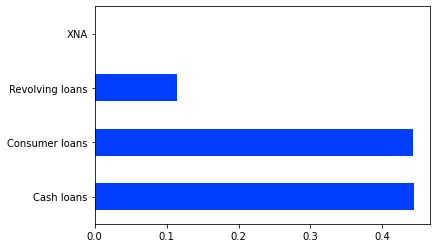

In [107]:
merged_df.NAME_CONTRACT_TYPE_y.value_counts(normalize=True).plot.barh()
plt.show()

Cash loans and consumer loans have equal amount of percentage.

In [108]:
merged_df.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

XAP                                0.5567
XNA                                0.4013
Repairs                            0.0142
Other                              0.0095
Urgent needs                       0.0051
Buying a used car                  0.0017
Building a house or an annex       0.0017
Everyday expenses                  0.0015
Medicine                           0.0013
Payments on other loans            0.0011
Education                          0.0009
Journey                            0.0007
Purchase of electronic equipment   0.0007
Buying a new car                   0.0006
Wedding / gift / holiday           0.0006
Buying a home                      0.0005
Car repairs                        0.0005
Furniture                          0.0005
Buying a holiday home / land       0.0003
Business development               0.0003
Gasification / water supply        0.0002
Buying a garage                    0.0001
Hobby                              0.0000
Money for a third person          

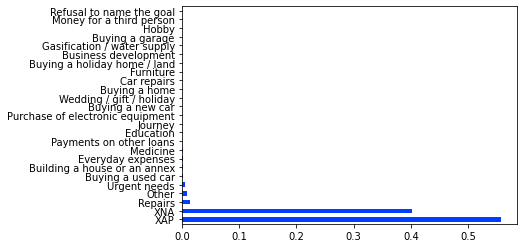

In [109]:
merged_df.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.barh()
plt.show()

The cash loan purpose has most values as XAP and XNA around 90%, so we dont consider this. It maybe that, most of the values are not applicable and doesnt add any value to our analysis.

In [110]:
merged_df.NAME_PAYMENT_TYPE.value_counts(normalize=True)

Cash through the bank                       0.6244
XNA                                         0.3699
Non-cash from your account                  0.0050
Cashless from the account of the employer   0.0007
Name: NAME_PAYMENT_TYPE, dtype: float64

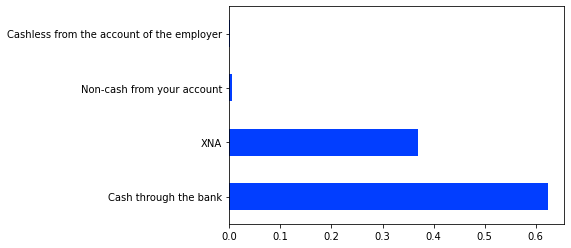

In [111]:
merged_df.NAME_PAYMENT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

Around 62% of people applied loans for Cash through the bank.

In [112]:
merged_df.CODE_REJECT_REASON.value_counts(normalize=True)

XAP      0.8103
HC       0.1033
LIMIT    0.0338
SCO      0.0231
CLIENT   0.0161
SCOFR    0.0077
XNA      0.0031
VERIF    0.0022
SYSTEM   0.0005
Name: CODE_REJECT_REASON, dtype: float64

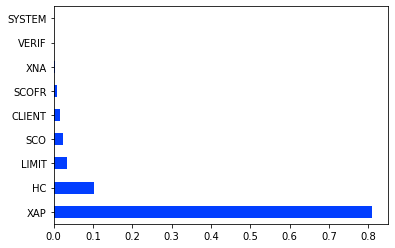

In [113]:
merged_df.CODE_REJECT_REASON.value_counts(normalize=True).plot.barh()
plt.show()

It seems that around 81% values are not applicable and hence it does not add any value to our analysis.

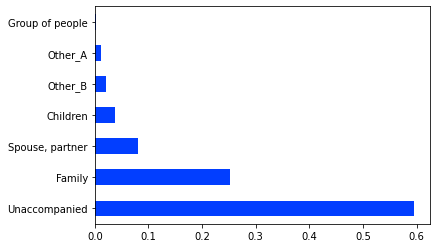

In [114]:
merged_df.NAME_TYPE_SUITE_y.value_counts(normalize=True).plot.barh()
plt.show()

It is mostly seen that, in most of the cases , all loan applicants were unaccompanied while applying for loans.

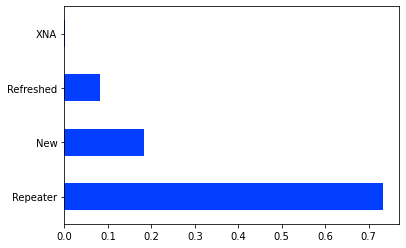

In [115]:
merged_df.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

It is observed that around 70% of applicants were repeaters.

In [116]:
merged_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved       0.6268
Canceled       0.1835
Refused        0.1736
Unused offer   0.0161
Name: NAME_CONTRACT_STATUS, dtype: float64

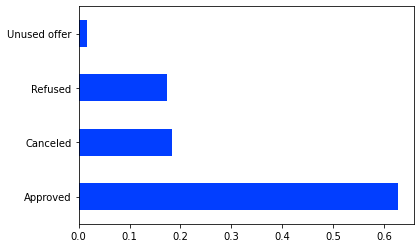

In [117]:
merged_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.barh()
plt.show()

It is observed that around 62% of applicants were approved of loan application.

In [118]:
merged_df.PRODUCT_COMBINATION.value_counts(normalize=True)

Cash                             0.1663
POS household with interest      0.1602
POS mobile with interest         0.1350
Cash X-Sell: middle              0.0849
Cash X-Sell: low                 0.0783
Card Street                      0.0669
POS industry with interest       0.0591
POS household without interest   0.0506
Card X-Sell                      0.0472
Cash Street: high                0.0366
Cash X-Sell: high                0.0359
Cash Street: middle              0.0212
Cash Street: low                 0.0202
POS other with interest          0.0144
POS mobile without interest      0.0141
POS industry without interest    0.0075
POS others without interest      0.0015
Name: PRODUCT_COMBINATION, dtype: float64

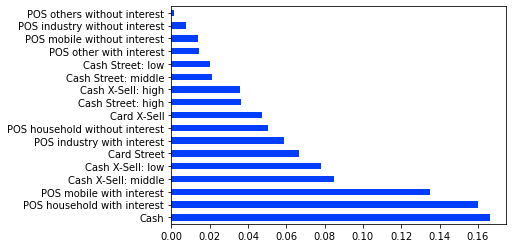

In [119]:
merged_df.PRODUCT_COMBINATION.value_counts(normalize=True).plot.barh()
plt.show()

Product_Combination were observed at around 16% for both Cash and POS with interest.

In [120]:
merged_df.NAME_YIELD_GROUP.value_counts(normalize=True)

XNA          0.3036
middle       0.2299
high         0.2165
low_normal   0.1944
low_action   0.0556
Name: NAME_YIELD_GROUP, dtype: float64

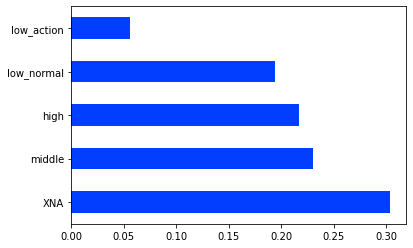

In [121]:
merged_df.NAME_YIELD_GROUP.value_counts(normalize=True).plot.barh()
plt.show()

It is found that ROI (Rate of interest) were found almost equal for high and middle interest values.

In [122]:
merged_df.NAME_GOODS_CATEGORY.value_counts(normalize=True)

XNA                        0.5639
Mobile                     0.1370
Consumer Electronics       0.0741
Computers                  0.0636
Audio/Video                0.0605
Furniture                  0.0321
Photo / Cinema Equipment   0.0154
Construction Materials     0.0151
Clothing and Accessories   0.0139
Auto Accessories           0.0044
Jewelry                    0.0037
Homewares                  0.0030
Medical Supplies           0.0023
Vehicles                   0.0020
Sport and Leisure          0.0018
Other                      0.0017
Gardening                  0.0016
Office Appliances          0.0014
Tourism                    0.0009
Medicine                   0.0009
Direct Sales               0.0002
Fitness                    0.0001
Additional Service         0.0001
Education                  0.0001
Weapon                     0.0000
Insurance                  0.0000
Animals                    0.0000
Name: NAME_GOODS_CATEGORY, dtype: float64

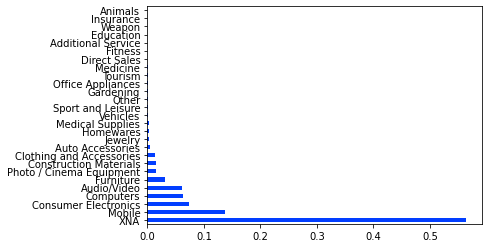

In [123]:
merged_df.NAME_GOODS_CATEGORY.value_counts(normalize=True).plot.barh()
plt.show()

Around 60% of Goods_Category were found to be XNA , and this does not add value to our analysis.

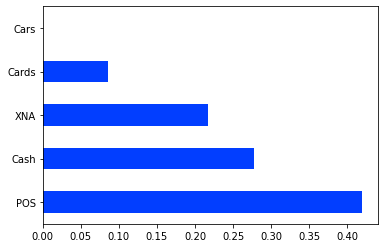

In [124]:
merged_df.NAME_PORTFOLIO.value_counts(normalize=True).plot.barh()
plt.show()

Around 45% of the loan applications were found to be under the Category 'POS'

In [125]:
merged_df.NAME_PRODUCT_TYPE.value_counts(normalize=True)

XNA       0.6367
x-sell    0.2726
walk-in   0.0907
Name: NAME_PRODUCT_TYPE, dtype: float64

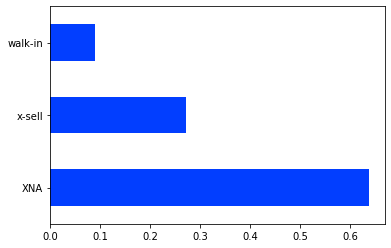

In [126]:
merged_df.NAME_PRODUCT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

Around 63% of NAME_PRODUCT_TYPE were found to be XNA , and this does not add value to our analysis.

In [127]:
merged_df.CHANNEL_TYPE.value_counts(normalize=True)

Credit and cash offices      0.4247
Country-wide                 0.2993
Stone                        0.1298
Regional / Local             0.0654
Contact center               0.0417
AP+ (Cash loan)              0.0351
Channel of corporate sales   0.0038
Car dealer                   0.0003
Name: CHANNEL_TYPE, dtype: float64

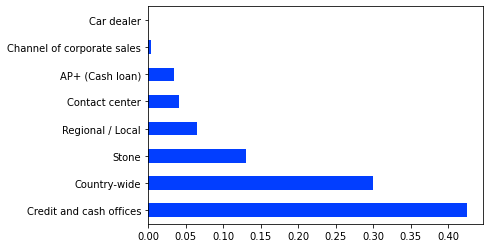

In [128]:
merged_df.CHANNEL_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

Around 43% of applications were acquired through Credit and Cash offices.

**Overall summary of Univariate analysis of prev_application_data.csv variables**

*   Cash loans and consumer loans have equal amount of percentage.
*   Around 43% of applications were acquired through Credit and Cash offices.
*   Around 45% of the loan applications were found to be under the Category 'POS'
*   It is found that ROI (Rate of interest) were found almost equal for high and middle interest values.
*   Product_Combination were observed at around 16% for both Cash and POS with interest.
*   It is observed that around 62% of applicants were approved of loan application.
*   It is observed that around 70% of applicants were repeaters.
*   It is mostly seen that, in most of the cases , all loan applicants were unaccompanied while applying for loans.
*   Around 62% of people applied loans for Cash through the bank.











**After completing the univariate analysis for all these variables, we only consider the following columns going forward: (We ignore the other columns because majority of values are XNA or XAP.)<br>
NAME_CONTRACT_TYPE_y<br>
NAME_PAYMENT_TYPE<br>
NAME_TYPE_SUITE_y<br>
NAME_CLIENT_TYPE<br>
NAME_CONTRACT_STATUS<br>
PRODUCT_COMBINATION<br>
NAME_PORTFOLIO<br>
CHANNEL_TYPE**


### UNIVARIATE ANALYSIS - NUMERICAL DATA



###### numerical_cols = ['AMT_ANNUITY_y' , 'AMT-APPLICATION','AMT_CREDIT_y','AMT_ANNUITY_y','DAYS_DECISION','CNT_PAYMENT','DAYS_FIRST_DUE','DAYS_LAST_DUE']




In [129]:
analysis_df.DAYS_DECISION = analysis_df.DAYS_DECISION.abs() //365

In [130]:
analysis_df.DAYS_DECISION.describe()

count   1413701.0000
mean          1.9173
std           2.1487
min           0.0000
25%           0.0000
50%           1.0000
75%           3.0000
max           8.0000
Name: DAYS_DECISION, dtype: float64

Average number of days taken by the bank to convey the decision = 2.

In [131]:
analysis_df.AMT_ANNUITY_y.describe()

count   1106483.0000
mean      15837.1850
std       14724.9069
min           0.0000
25%        6257.8575
50%       11223.7650
75%       20420.7750
max      418058.1450
Name: AMT_ANNUITY_y, dtype: float64

Mean amount of annuity = 15837
And highest value of annuinty = 418058

In [132]:
analysis_df.AMT_APPLICATION.describe()

count   1413701.0000
mean     175243.5937
std      293622.1931
min           0.0000
25%       19750.5000
50%       70870.5000
75%      180000.0000
max     5850000.0000
Name: AMT_APPLICATION, dtype: float64

Mean amount of application = 175243
And highest value of loan application = 5850000

In [133]:
analysis_df.AMT_CREDIT_y.describe()

count   1413700.0000
mean     196354.0861
std      319481.2507
min           0.0000
25%       24880.5000
50%       80595.0000
75%      215640.0000
max     4509688.5000
Name: AMT_CREDIT_y, dtype: float64

Mean amount of annuity = 196354
And highest value of annuity = 4509688

In [134]:
analysis_df.CNT_PAYMENT.describe()

count   1106488.0000
mean         16.0519
std          14.5667
min           0.0000
25%           6.0000
50%          12.0000
75%          24.0000
max          84.0000
Name: CNT_PAYMENT, dtype: float64

Average term for all loans is around 16 (months/years as per the unit taken in the dataset)

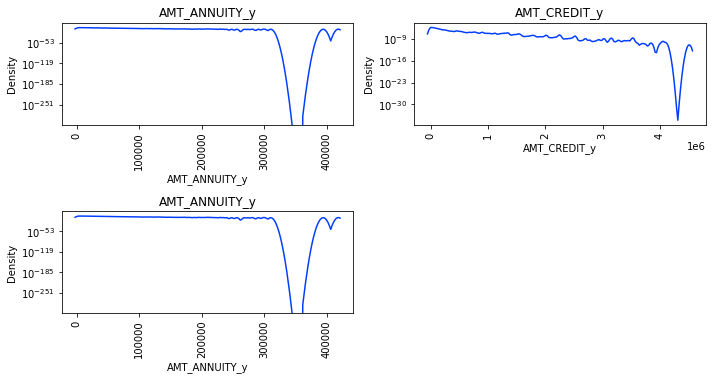

In [135]:
numerical_cols = ['AMT_ANNUITY_y','AMT_CREDIT_y','AMT_ANNUITY_y']
plt.figure(figsize = (10, 5))

for col in enumerate(numerical_cols):
    plt.subplot(2, 2, col[0]+1)
    plt.title(col[1])
    sns.distplot(analysis_df[col[1]], hist =False) #BLUE
    plt.tight_layout()
    plt.yscale('log')
    plt.xticks(rotation = 90)

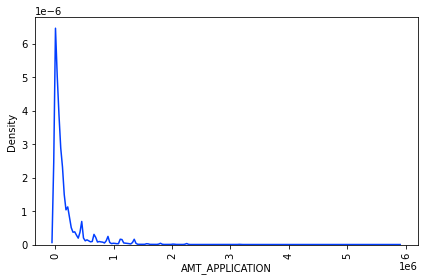

In [136]:
sns.distplot(analysis_df['AMT_APPLICATION'], hist =False) #BLUE
plt.xticks(rotation = 90)
plt.tight_layout()


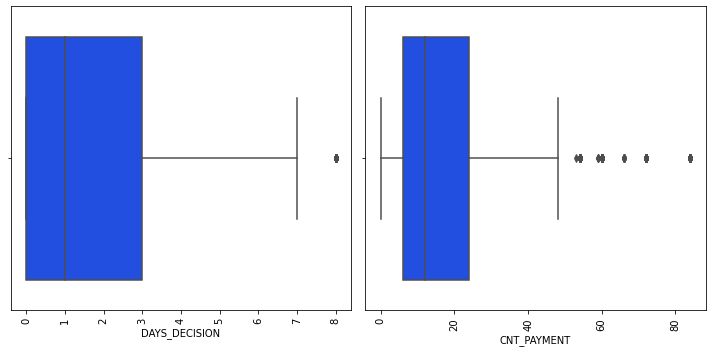

In [137]:
numerical_cols = ['DAYS_DECISION','CNT_PAYMENT']
plt.figure(figsize = (10, 5))

for col in enumerate(numerical_cols):
    plt.subplot(1, 2, col[0]+1)
    sns.boxplot(x = col[1], data = analysis_df)
    plt.xticks(rotation = 90)
    plt.tight_layout()

**QUICK SUMMARY ON NUMERICAL DATA ANALYSIS ON MERGED_DF**

*   **Average number of days taken by the bank to convey the decision = 2.**<br>
*   **Mean amount of annuity = 15837 And highest value of annuinty = 418058**<br>
*   **Mean amount of application = 175243 And highest value of loan application = 5850000**<br>
*   **Mean amount of annuity = 196354 And highest value of annuity = 4509688**<br>
*   **Average term for all loans is around 16 (months/years as per the unit taken in the dataset)** 


## BIVARIATE ANALYSIS ON COLUMNS PRESENT IN CURRENT_APPLICATION W.R.T NAME_CONTRACT_STATUS.

### CATEGORICAL COLUMMS

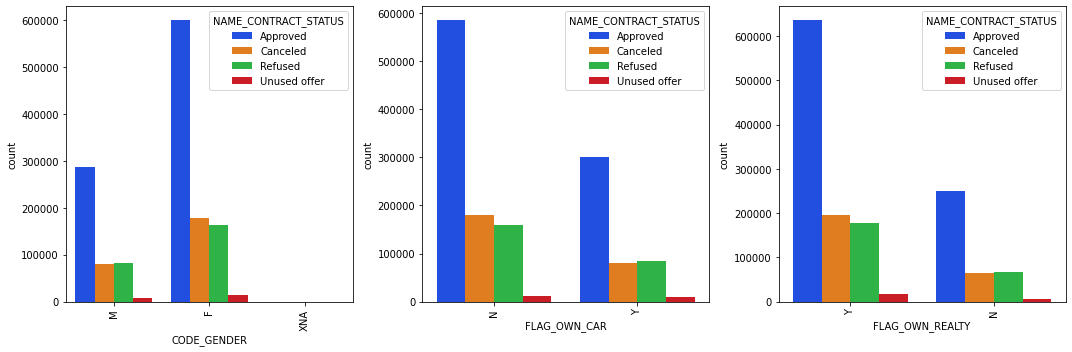

In [138]:
categoricalcols_Appl = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']
plt.figure(figsize = (15, 5))

for i in enumerate(categoricalcols_Appl):
    plt.subplot(1, 3, i[0]+1)
    g = sns.countplot(x = i[1], hue = 'NAME_CONTRACT_STATUS', data = analysis_df)
    plt.tight_layout()
    plt.xticks(rotation = 90 , visible = True)

It is found that Females who own a house and do not own a car have a greater probability of their loan being approved.

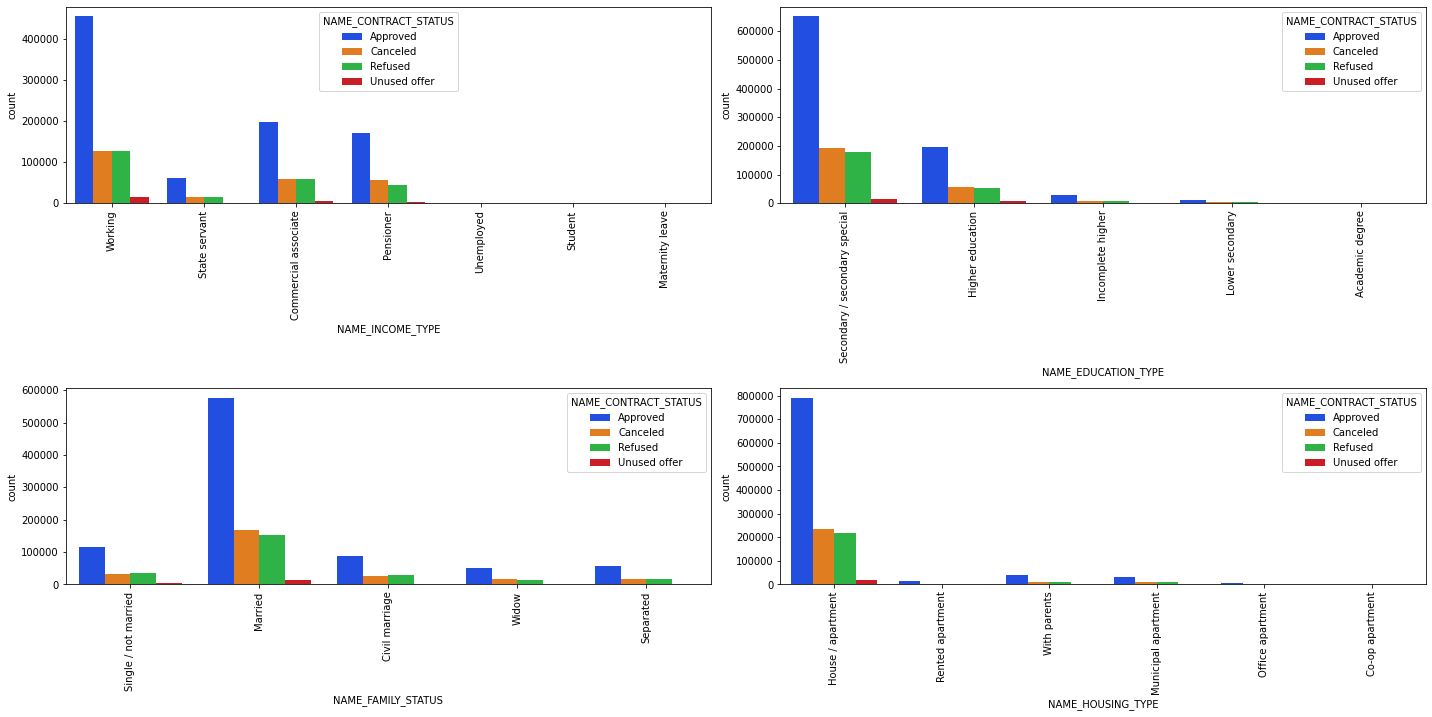

In [139]:
categoricalcols_Appl = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
plt.figure(figsize = (20, 10))

for i in enumerate(categoricalcols_Appl):
    plt.subplot(2, 2, i[0]+1)
    g = sns.countplot(x = i[1], hue = 'NAME_CONTRACT_STATUS', data = analysis_df)
    plt.tight_layout()
    plt.xticks(rotation = 90 , visible = True)

It is found that working class with secondary education , who are married and live in their house / apartment have better chances of loan approval.

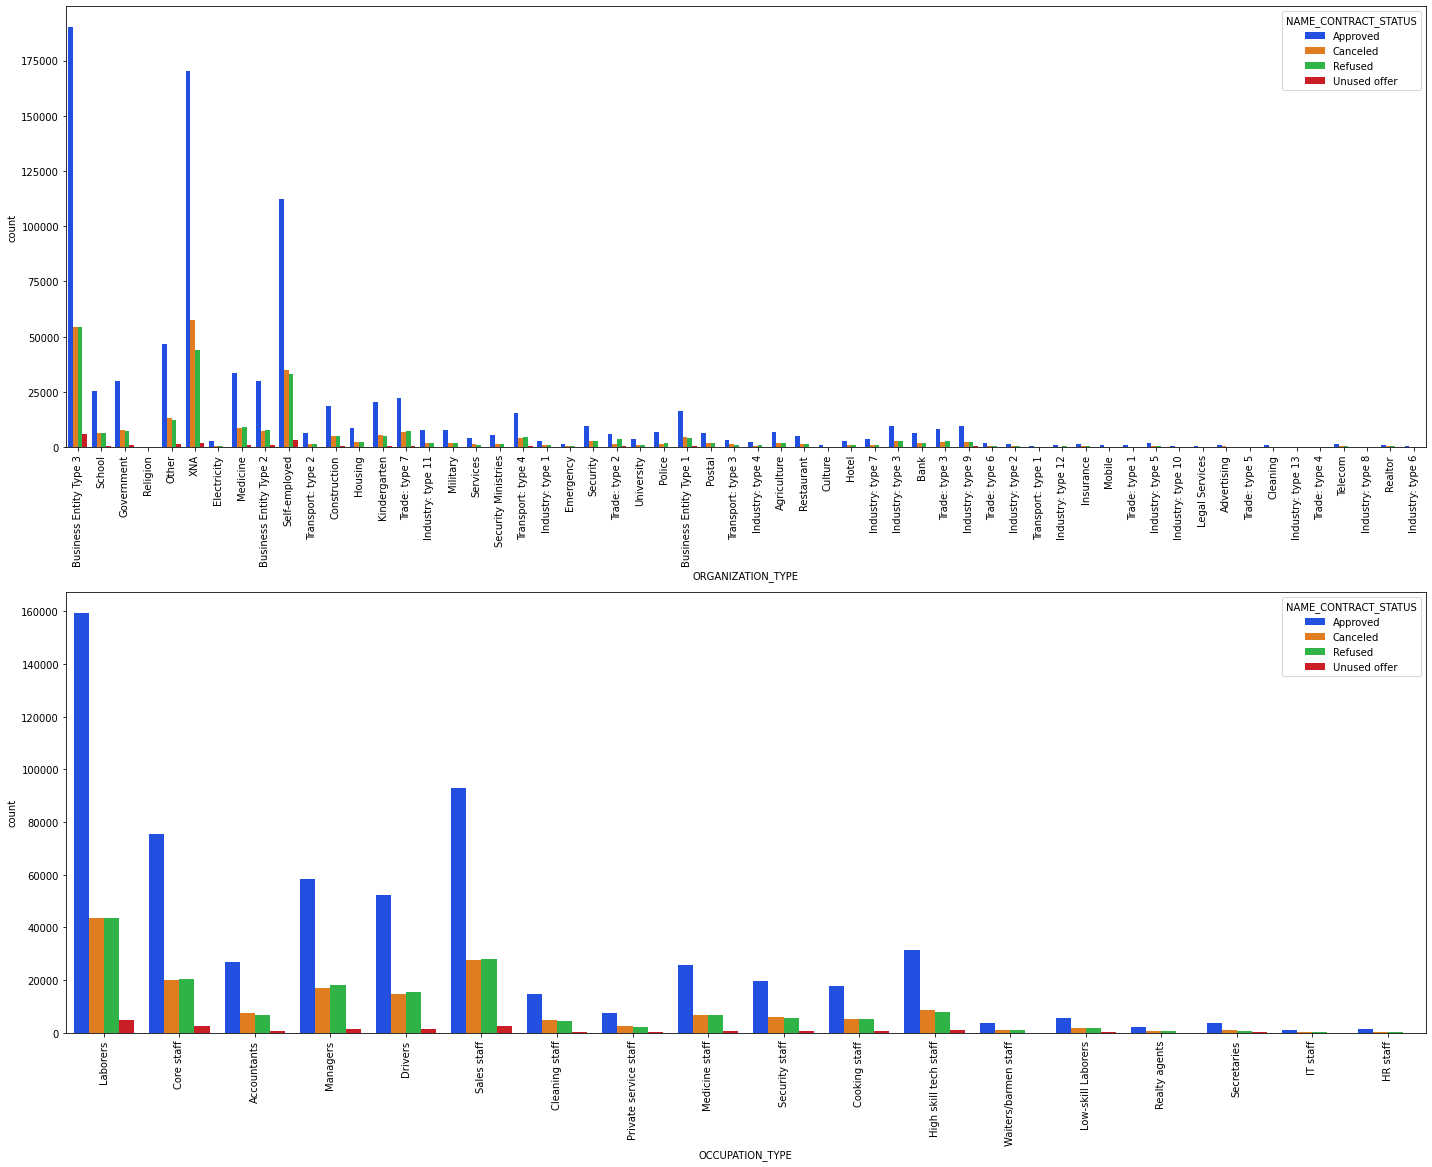

In [140]:
categoricalcols_Appl = ['ORGANIZATION_TYPE','OCCUPATION_TYPE']
plt.figure(figsize = (20, 15))

for i in enumerate(categoricalcols_Appl):
    plt.subplot(2, 1, i[0]+1)
    g = sns.countplot(x = i[1], hue = 'NAME_CONTRACT_STATUS', data = analysis_df)
    plt.tight_layout()
    plt.xticks(rotation = 90 , visible = True)

It is found that BusinessEntity and Labor class loans are approved the highest.

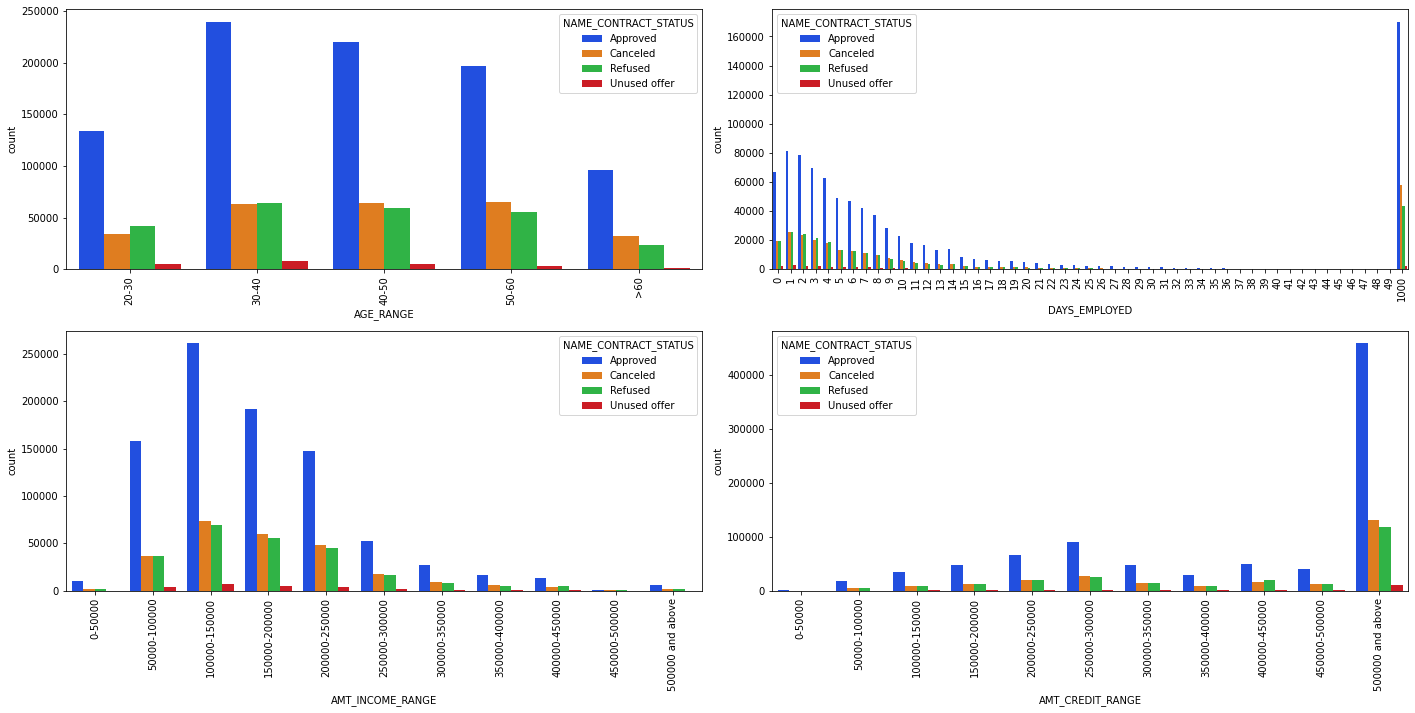

In [141]:
categoricalcols_Appl = ['AGE_RANGE','DAYS_EMPLOYED','AMT_INCOME_RANGE','AMT_CREDIT_RANGE']
plt.figure(figsize = (20, 10))

for i in enumerate(categoricalcols_Appl):
    plt.subplot(2, 2, i[0]+1)
    g = sns.countplot(x = i[1], hue = 'NAME_CONTRACT_STATUS', data = analysis_df)
    plt.tight_layout()
    plt.xticks(rotation = 90 , visible = True)

People who have a age range between 30-40 and have 2-3 years of work_experience, with an income_range of 100000 - 150000 and a credit range of 500000 and above have greater chances of approval

**Insights from Bi-Variate analysis w.r.t current application data**


*   **People who have a age range between 30-40 and have 2-3 years of work_experience, with an income_range of 100000 - 150000 and a credit range of 500000 and above have greater chances of approval** <br>
*   **It is found that BusinessEntity and Labor class loans are approved the highest.**<br>
*   **It is found that working class with secondary education , who are married and live in their house / apartment have better chances of loan approval.**<br>
*   **It is found that Females who own a house and do not own a car have a greater probability of their loan being approved.**



### NUMERICAL COLUMNS

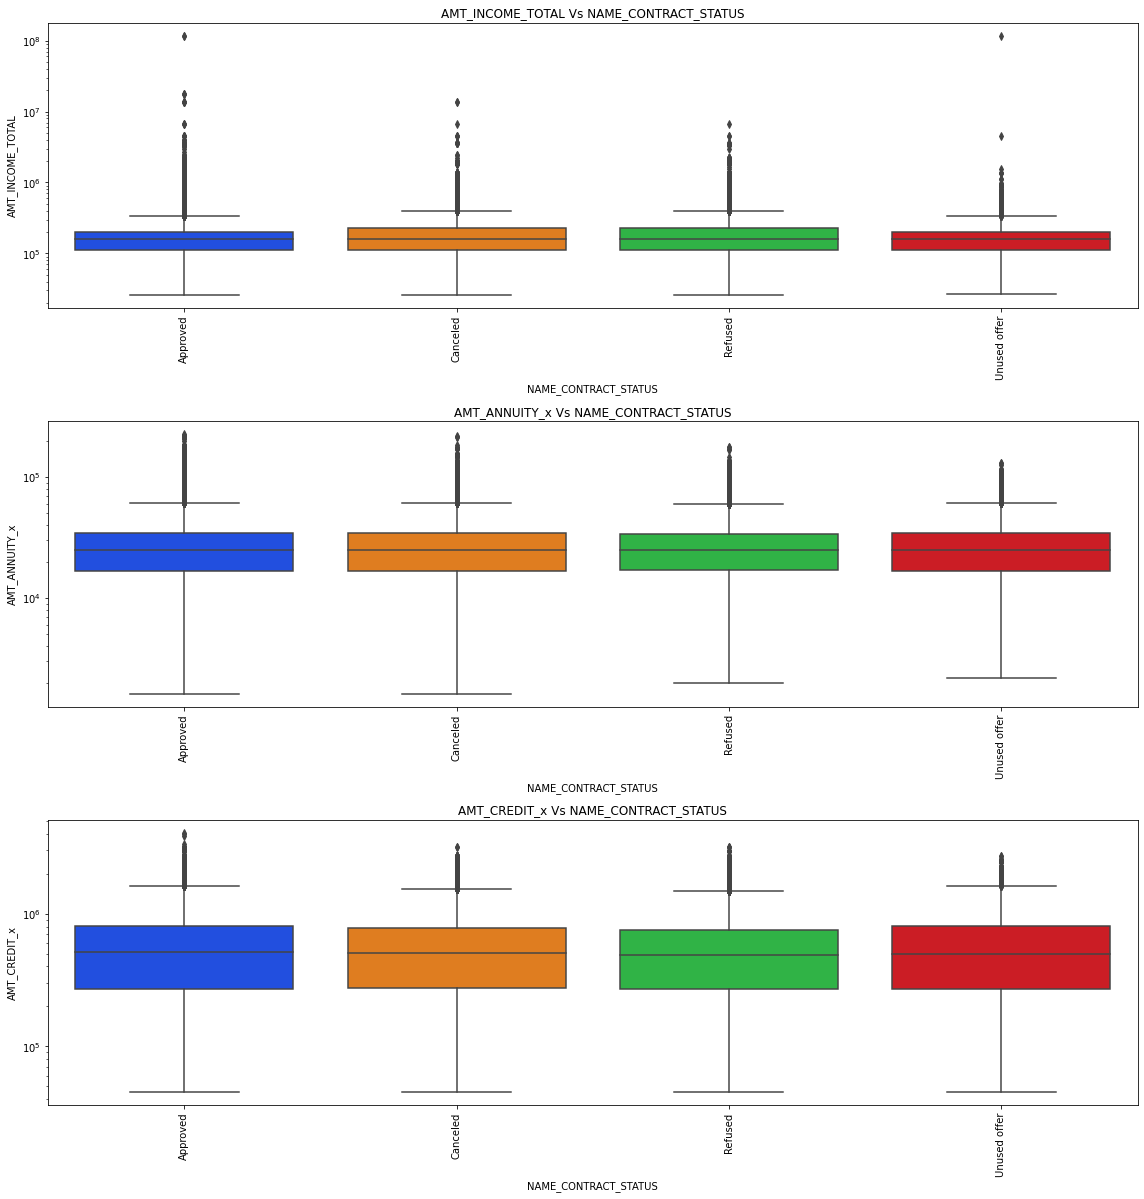

In [142]:
Required_columns= ['AMT_INCOME_TOTAL','AMT_ANNUITY_x','AMT_CREDIT_x']
sns.set_palette("bright")

plt.figure(figsize = (16, 16))

for col in enumerate(Required_columns):
    plt.subplot(3, 1, col[0]+1)
    plt.title(col[1]+ " Vs NAME_CONTRACT_STATUS")
    sns.boxplot(data = analysis_df, x='NAME_CONTRACT_STATUS',y=col[1])
    plt.tight_layout()
    plt.yscale('log')
    plt.xticks(rotation = 90)

We can observe that the mean value for all the amount/ numerical variables in case of application_data is same. 

## BIVARIATE ANALYSIS ON COLUMNS PRESENT IN PREV_APPLICATION.CSV W.R.T NAME_CONTRACT_STATUS - CATEGORICAL DATA 

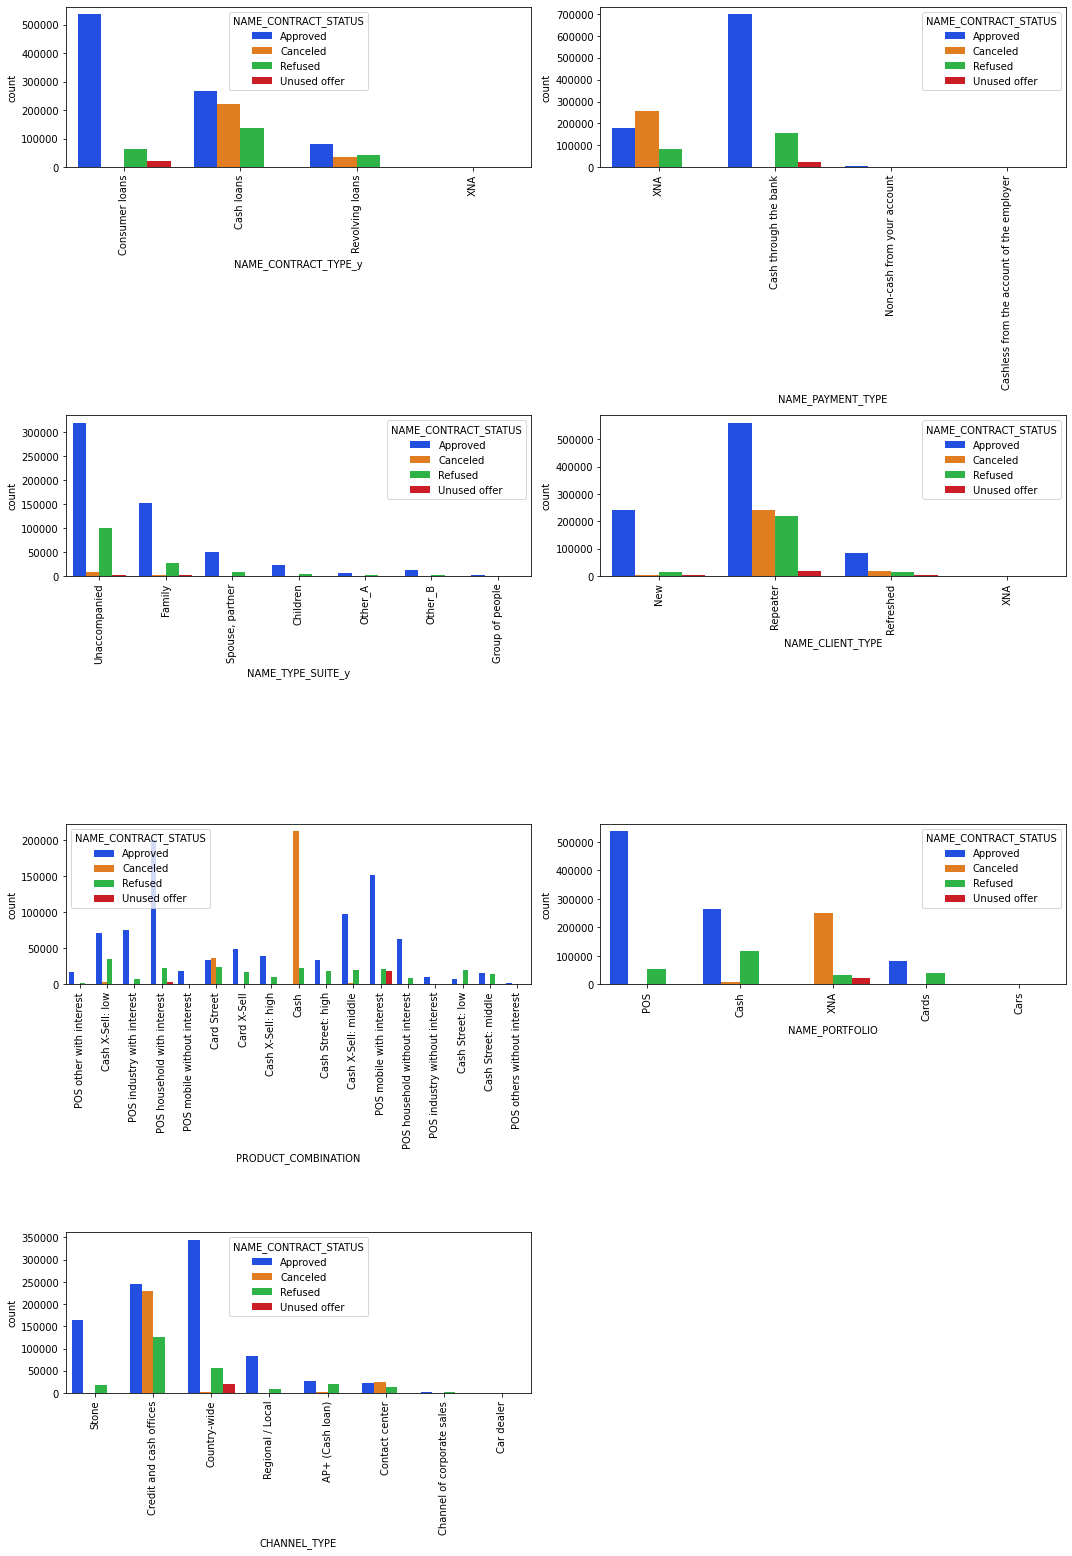

In [143]:
categoricalcols_Prev = ['NAME_CONTRACT_TYPE_y','NAME_PAYMENT_TYPE','NAME_TYPE_SUITE_y','NAME_CLIENT_TYPE','PRODUCT_COMBINATION','NAME_PORTFOLIO','CHANNEL_TYPE']

plt.figure(figsize = (15, 20))
for i in enumerate(categoricalcols_Prev):
    plt.subplot(4, 2, i[0]+1)
    g = sns.countplot(x = i[1], hue = 'NAME_CONTRACT_STATUS', data = analysis_df)
    plt.tight_layout()
    plt.xticks(rotation = 90 , visible = True)

**Insights from Bi-Variate analysis w.r.t current application data**


*   **People who are unaccompanied have a greater rate of loan approval** <br>
*   **People with consumer and cash loans through the bank have a greater rate of approval**<br>
*   **Repeaters have a greater rate of loan approval**<br>
*   **People having a NAME_PORTFOLIO  = POS have a greater rate of loan approval.**<br>
*   **People with Product_Combination POS with Household_interest have a greater rate of approval but cancel rate is greater for Product_combination having cash**<br>
*   **Country-Wide offices have a greater approval rate**




## BIVARIATE ANALYSIS ON COLUMNS PRESENT IN PREV_APPLICATION.CSV W.R.T NAME_CONTRACT_STATUS - NUMERICAL DATA

<Figure size 1440x1080 with 0 Axes>

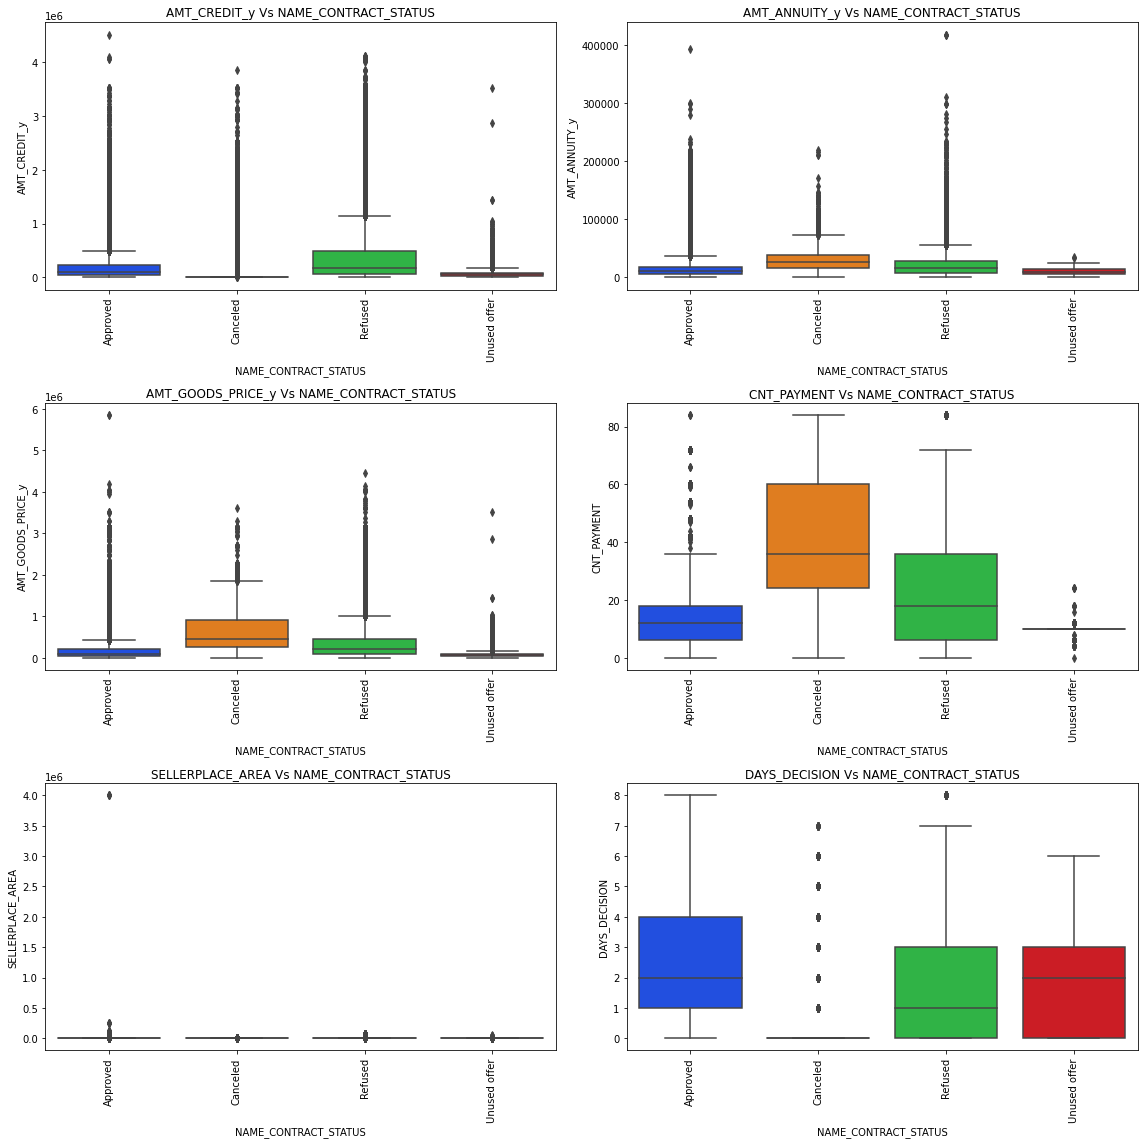

In [144]:
req_cols=['AMT_CREDIT_y', 'AMT_ANNUITY_y', 'AMT_GOODS_PRICE_y','CNT_PAYMENT','SELLERPLACE_AREA','DAYS_DECISION']
plt.figure(figsize = (20, 15))

plt.figure(figsize = (16, 16))

for col in enumerate(req_cols):
    plt.subplot(3, 2, col[0]+1)
    plt.title(col[1]+ " Vs NAME_CONTRACT_STATUS")
    sns.boxplot(data = analysis_df, x='NAME_CONTRACT_STATUS',y=col[1])
    plt.tight_layout()
    plt.xticks(rotation = 90)

**Inference from the above analysis**

*   **Mean for all AMT_GOODS_PRICE is found to be higher for cancelled applications.**
*   **The term (CNT_PAYMENT) is found to be higher in case of Cancelled applications**
*   **Mean for AMT_ANNUITY AND AMT_CREDIT is found to be almost equal and lies in the range of 100000**




# SUMMARY

**From the above data we can summarise that:**

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

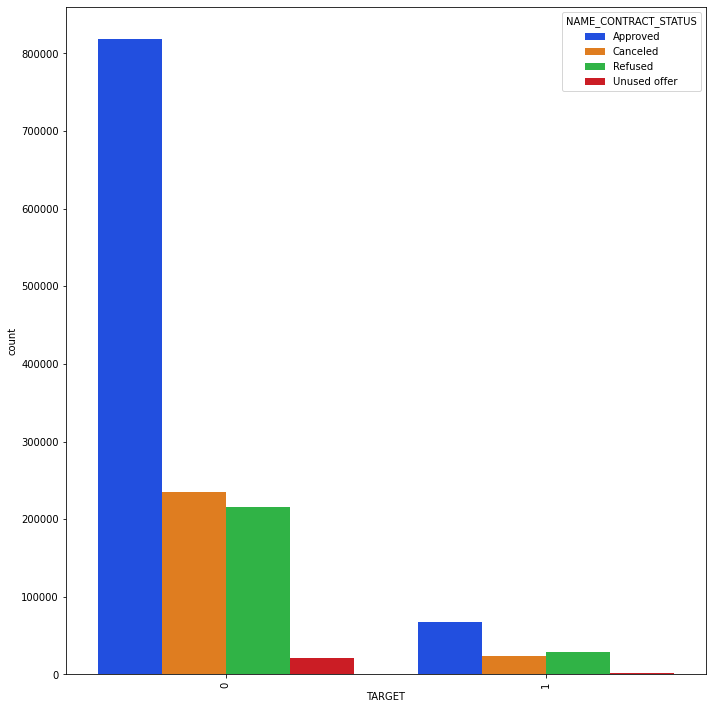

In [145]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'TARGET', hue = 'NAME_CONTRACT_STATUS', data = analysis_df)
plt.tight_layout()
plt.xticks(rotation = 90 , visible = True)


*   The target column in the current application data has an imbalance percentage of 91% (People with no payment difficulties) and 9% (Defaulters).

*   When we perform univariate and bivariate analysis on different variables w.r.t Target 0 and Target 1, we infer that the trend for both these variables remain the same.

*  With the variables obtained from the first data we perform analysis on Prev_Application_Data.csv and extract variables which have a great impact on loan approvals.

*   We find that the trends for loan approval and trends on target variable mostly remains the same.

*   We extract the columns that have a high influence on the Target variable. These variables have a high ratio to not have any payment difficulties.
 
*  On performing analysis on merged data , we find that loan approval rate for such columns are fairly high when compared to other variables.

*   On plotting, Target v/s Name_Contract_Status , we can infer the number of defaulters were high for variables on which the loan was approved.


*   For target = 0  - Loan was approved.

Hence, we need to find all the categories where loan was approved.



 

The loan approval rate was found to be very high for these cols and hence we must focus on these variables while providing the loan.

*   INCOME_TYPE : WORKING
*   NAME_CONTRACT_TYPE : CASH LOANS & CONSUMER LOANS 
*   NAME_SUITE_TYPE: UNACCOMPANIED & FAMILY
*   EDU : SECONDARY 
*   FAMILY_STATUS: MARRIED (INCLUDING CIVIL MARRAIAGE)
*   DAYS EMPLOYED : < 5 YEARS 
*   OCC_TYPE: LABORERS AND SALES_STAFF
*   ORG_TYPE : BUSINESS_ENTITY_3 & SELF-EMPLOYED
*   AMT_INCOME_RANGE  =  100000 - 150000
*   AMT_CREDIT_RANGE  =  500000 AND ABOVE
*   AGE = 30-40 
*   THEY OWN A HOUSE BUT DO NOT A OWN A CAR

**WE CAN CONCLUDE THAT WHILE LENDING LOANS WE MUST ENSURE THAT THESE PEOPLE WHO FALL UNDER THE ABOVE MENTIONED CATEGORIES HAVE A GREATER DEFAULTER VALUE. HENCE THE BANK MUST TAKE PRECAUTIONARY MEASURE WHILE APPROVING THE LOANS FOR SUCH VARIABLES.**



---

